In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Netflix.csv")

In [ ]:
data.shape

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
data.head(5)

# **Cleaning Data - Check & Drop Duplicated & Drop Row will all NaN Values**

In [3]:
sum(data.duplicated())

0

In [4]:
data.dropna(axis = 1, how = "all",inplace=True)

# **Cleaning Data - Filling NaN**
1. Director  - unknown director
2. Cast - unknown cast
3. country - unknown country
4. date_added - Unknown
5. rating - NR
6. Duration - 0
7. Date_added - leaving as NaN only

In [6]:
data["director"].fillna("unknown_director",inplace=True)
data["country"].fillna("unknown_country",inplace = True)
data["cast"].fillna("unknown_cast",inplace = True)
data["rating"].fillna("NR",inplace = True)
data["duration"].fillna("0 time",inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Cleaning Data - Unesting Columns**
1. Country
2. Cast
3. Listed_in
4. Director

I just splitting them into Lists, will use explode later whenever needed






In [7]:
data["country"]=data["country"].str.split(", ")
data["cast"]=data["cast"].str.split(", ")
data["listed_in"]=data["listed_in"].str.split(", ")
data["director"] = data["director"].str.split(", ")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Changing "Rating Columns" from cateogorical to Numerical**

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min

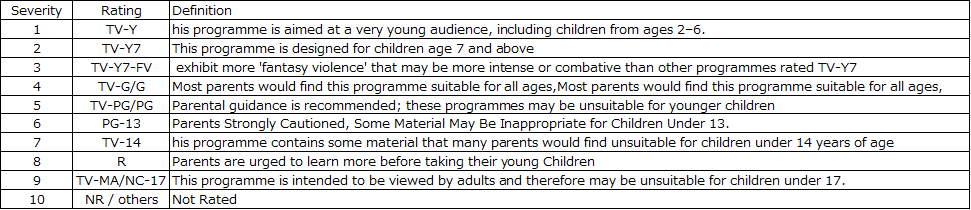








In [ ]:
data["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            84
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [8]:
data["rating"]=data["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])

In [9]:
data["rating"].value_counts()

9     3210
7     2160
5     1150
8      799
6      490
2      334
1      307
4      261
10      90
3        6
Name: rating, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   int64 
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


# **Changing "Duration Columns" from Object to Int**

Ex:


*   TV Shows duration are given as seasons, so changing 2 Seasons --> 2
*   Movies duration are given as min, so changing 119 mins --> 119



In [10]:
data["duration"]=data["duration"].str.split(expand = True)[0]
data["duration"] = data["duration"].astype("int64")

In [ ]:
data.info()

# **Changing Column "Date_added" Dtype to datetime**

In [12]:
data["date_added"]=data["date_added"].astype("datetime64")

# **Statistical Analysis of Cleaned Data**

In [14]:
data.describe()

,release_year,rating,duration
count,8807.000000,8807.000000,8807.000000
mean,2014.180198,7.043147,69.823095
std,8.819312,2.167461,50.822520
min,1925.000000,1.000000,0.000000
25%,2013.000000,6.000000,2.000000
50%,2017.000000,7.000000,88.000000
75%,2019.000000,9.000000,106.000000
max,2021.000000,10.000000,312.000000


In [15]:
data.describe(include=object)

,show_id,type,title,director,cast,country,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,514,8775
top,s1,Movie,Dick Johnson Is Dead,[unknown_director],[unknown_cast],[United States],"[Dramas, International Movies]","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,362,4


In [16]:
data.describe(datetime_is_numeric=True)

,date_added,release_year,rating,duration
count,8797,8807.000000,8807.000000,8807.000000
mean,2019-05-17 05:59:08.436967168,2014.180198,7.043147,69.823095
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-04-06 00:00:00,2013.000000,6.000000,2.000000
50%,2019-07-02 00:00:00,2017.000000,7.000000,88.000000
75%,2020-08-19 00:00:00,2019.000000,9.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,10.000000,312.000000
std,NaN,8.819312,2.167461,50.822520


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   int64         
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 825.8+ KB


# **Creating New  DataFrame in which NaN Values are not filled - "data2"**

*   To avoid getting Unknown Values in Graphical & Non-Graphical Analysis, Else Unknown values will come in the Analysis




In [18]:
data2 = pd.read_csv("Netflix.csv")
data2["country"]=data2["country"].str.split(", ")
data2["cast"]=data2["cast"].str.split(", ")
data2["listed_in"]=data2["listed_in"].str.split(", ")
data2["director"] = data2["director"].str.split(", ")
data2["rating"].fillna("NR",inplace = True)
data2["duration"].fillna("0 time",inplace=True)
data2["rating"]=data2["rating"].replace(["TV-Y","TV-Y7","TV-Y7-FV","TV-G","G","TV-PG","PG","PG-13","TV-14","R","TV-MA","NC-17","NR","UR","74 min","84 min","66 min"],[1,2,3,4,4,5,5,6,7,8,9,9,10,10,10,10,10])
data2["date_added"]=data2["date_added"].astype("datetime64")
data2["duration"]=data2["duration"].str.split(expand = True)[0]
data2["duration"] = data2["duration"].astype("int64")

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   int64         
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 825.8+ KB


# **Categorical Variable - Graphical & Non-Graphical Analysis**

## Type - A Movie or TV Show

In [ ]:
data["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

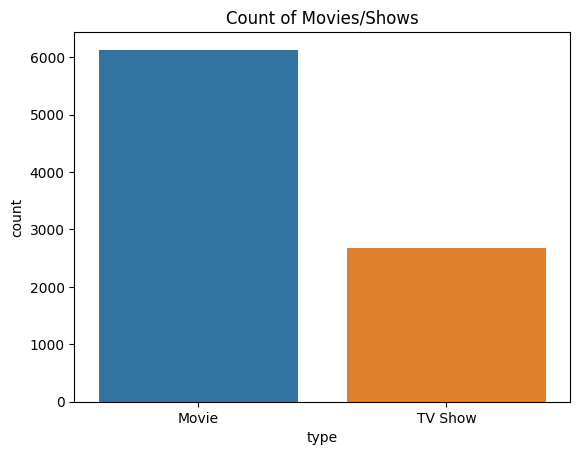

In [ ]:
sns.countplot(data = data,x="type")
plt.title("Count of Movies/Shows")
plt.show()

Inference : Movies Qty is more than TV Shows Qty



---



---





## Director

In [ ]:
data2.explode("director")["director"].value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

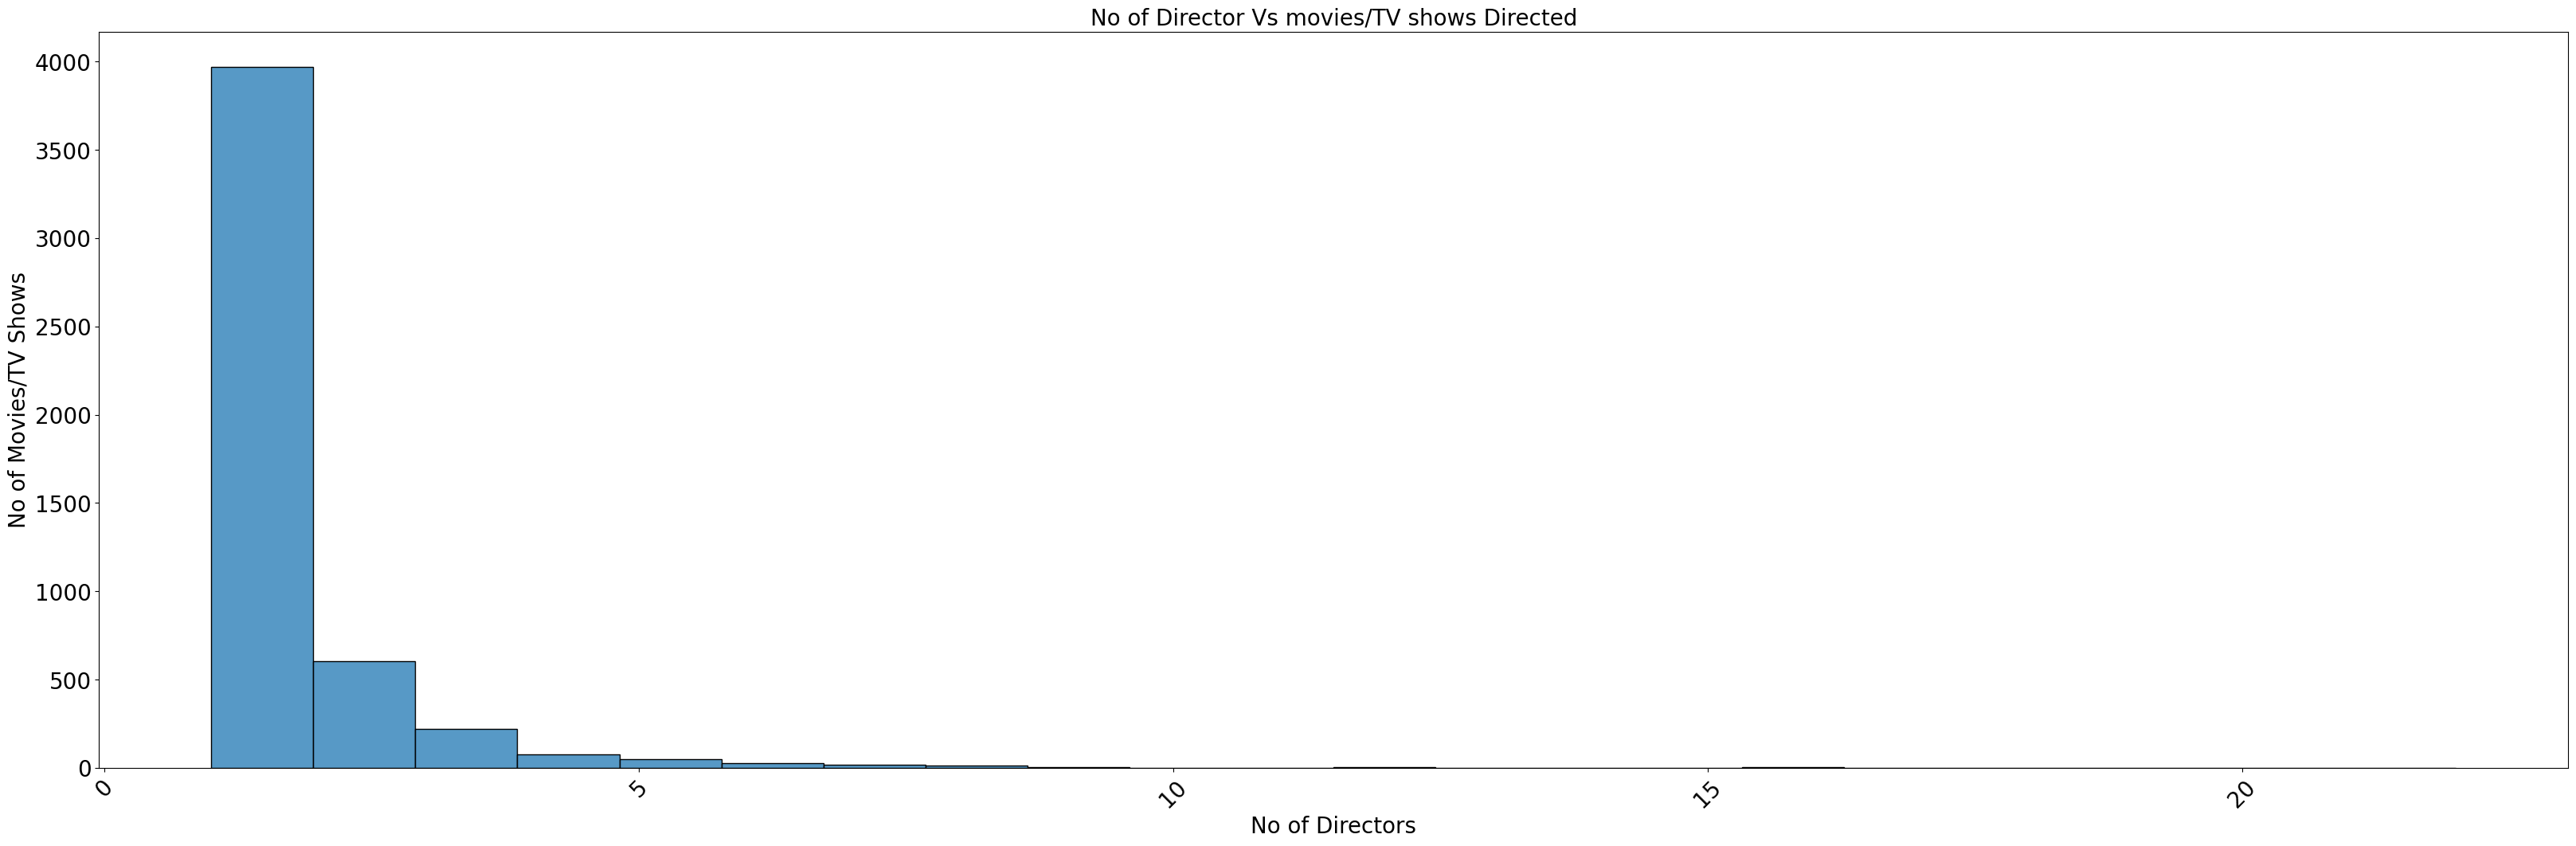

In [ ]:
A=data2.explode("director")["director"].value_counts().reset_index()
plt.figure(figsize=(40,12))
sns.histplot(A["director"],bins=22)
plt.title("No of Director Vs movies/TV shows Directed",fontsize = 20)
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("No of Directors",fontsize = 20)
plt.ylabel("No of Movies/TV Shows",fontsize = 20)
plt.show()



*   Total Number of Directors in Netflix Platfrom = 4993
*   Maximum Shows Directed by single Director = 22
*   Minimum Shows Directed by single Director= 1
*   Almost 80% Directors have their show First time in Netflix

---



---



## Cast

In [ ]:
data2.explode("cast")["cast"].value_counts()

Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: cast, Length: 36439, dtype: int64

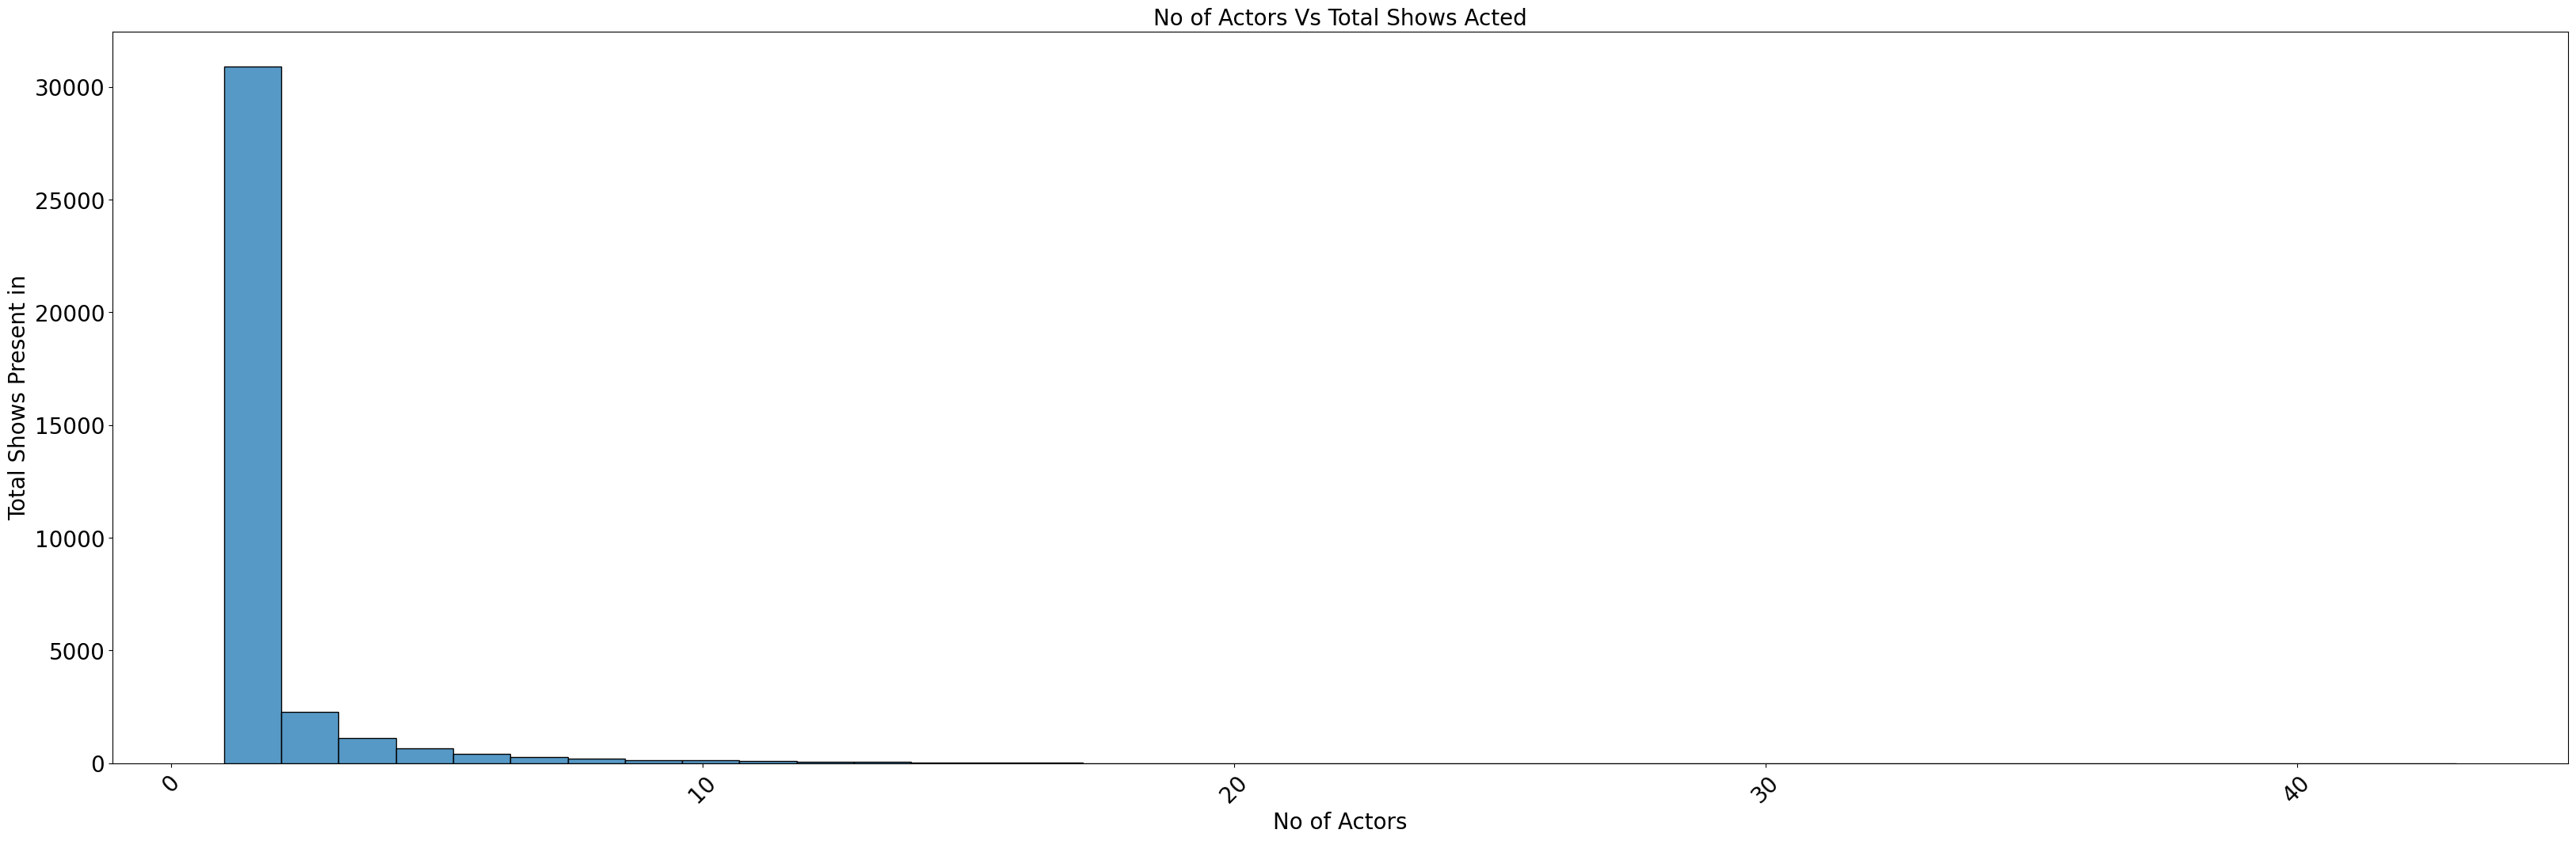

In [ ]:
A=data2.explode("cast")["cast"].value_counts().reset_index()
plt.figure(figsize=(40,12))
sns.histplot(A["cast"],bins=39)
plt.title("No of Actors Vs Total Shows Acted",fontsize = 20)
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("No of Actors",fontsize = 20)
plt.ylabel("Total Shows Present in",fontsize = 20)
plt.show()

*   Total Number of Actors in Netflix Platfrom = 36439
*   Maximum Shows Acted = 43
*   Minimum Shows Acted = 1
*   Almost 75% Actor have their Show for First time in Netflix

---



---



## Country

In [ ]:
data2.explode("country")["country"].value_counts()

United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 127, dtype: int64

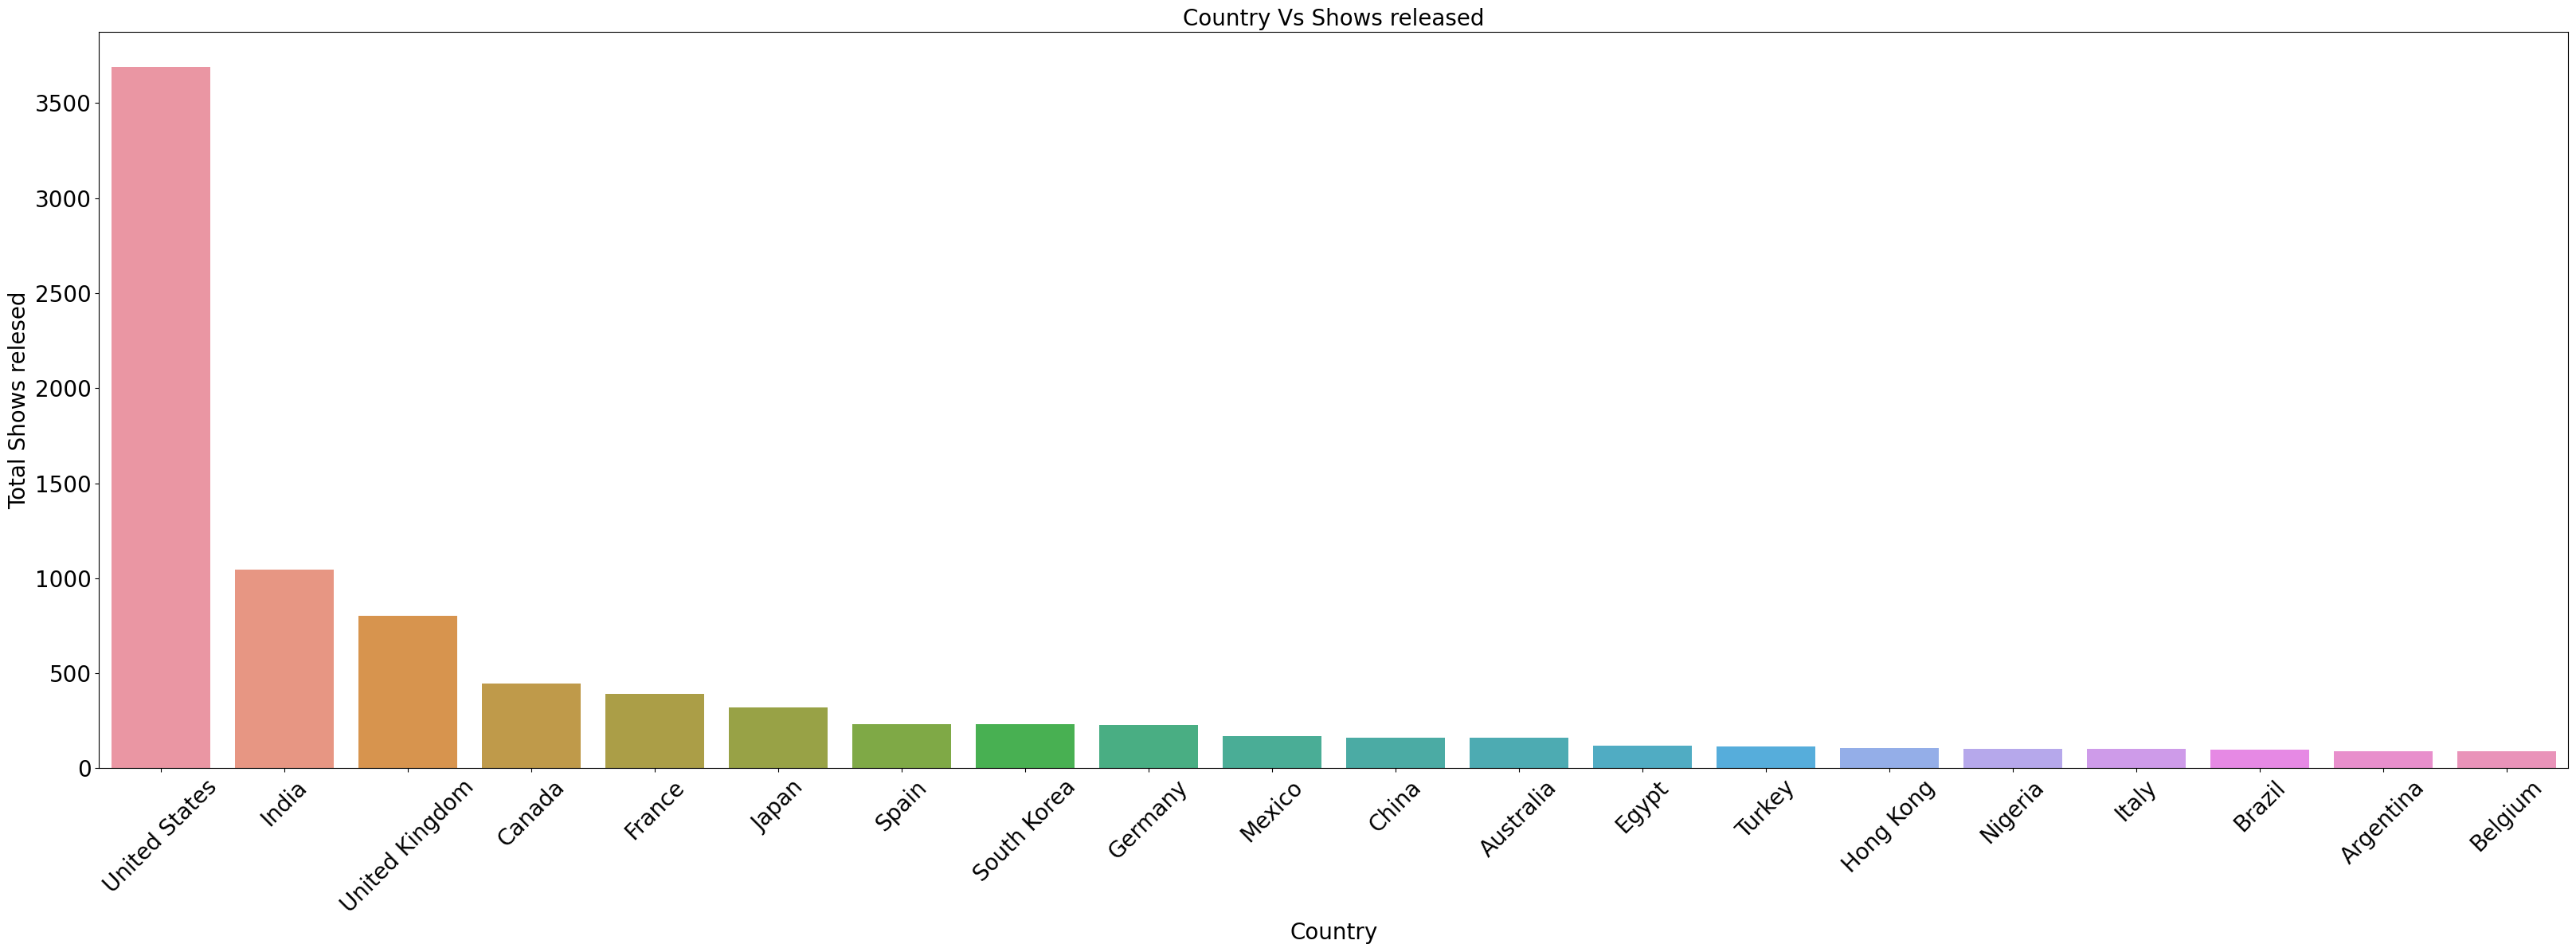

In [ ]:
A = data2.explode("country")["country"].value_counts().reset_index().iloc[:20]
plt.figure(figsize=(40,12))
sns.barplot(data=A,x="index",y="country")
plt.title("Country Vs Shows released",fontsize = 20)
plt.xticks(rotation=45,fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Country",fontsize = 20)
plt.ylabel("Total Shows relesed",fontsize = 20)
plt.show()

*   Netflix content avaiable in 127 Countries
*   Maximum Content Released in United States

---



---





## Date_added

In [ ]:
data["date_added"].dt.year.value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added, dtype: int64

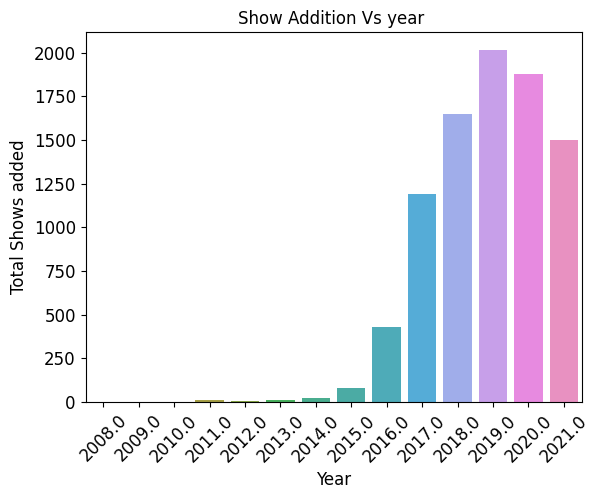

In [20]:
sns.countplot(x=data["date_added"].dt.year)
plt.title("Show Addition Vs year ",fontsize = 12)
plt.xticks(rotation=45,fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Year",fontsize = 12)
plt.ylabel("Total Shows added",fontsize = 12)
plt.show()



*   Netflix started shows addition from 2008 and adding content since then every year
*   Shows addition started to drastically increase from 2016 & Peaked in year 2019 with 2016 Nos shows added in single year

---



---





## Ratings

Ratings has been changed from Categorical to Numerical

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min

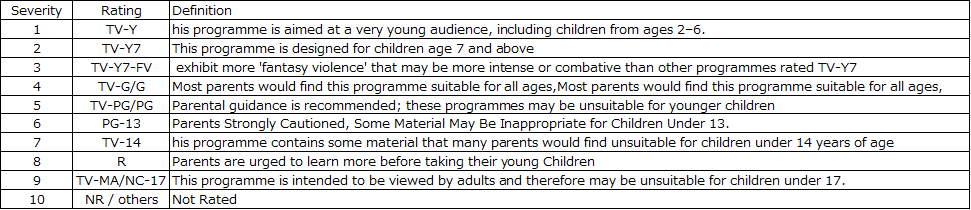








In [ ]:
data["rating"].value_counts()

9     3210
7     2160
5     1150
8      799
6      490
2      334
1      307
4      261
10      90
3        6
Name: rating, dtype: int64

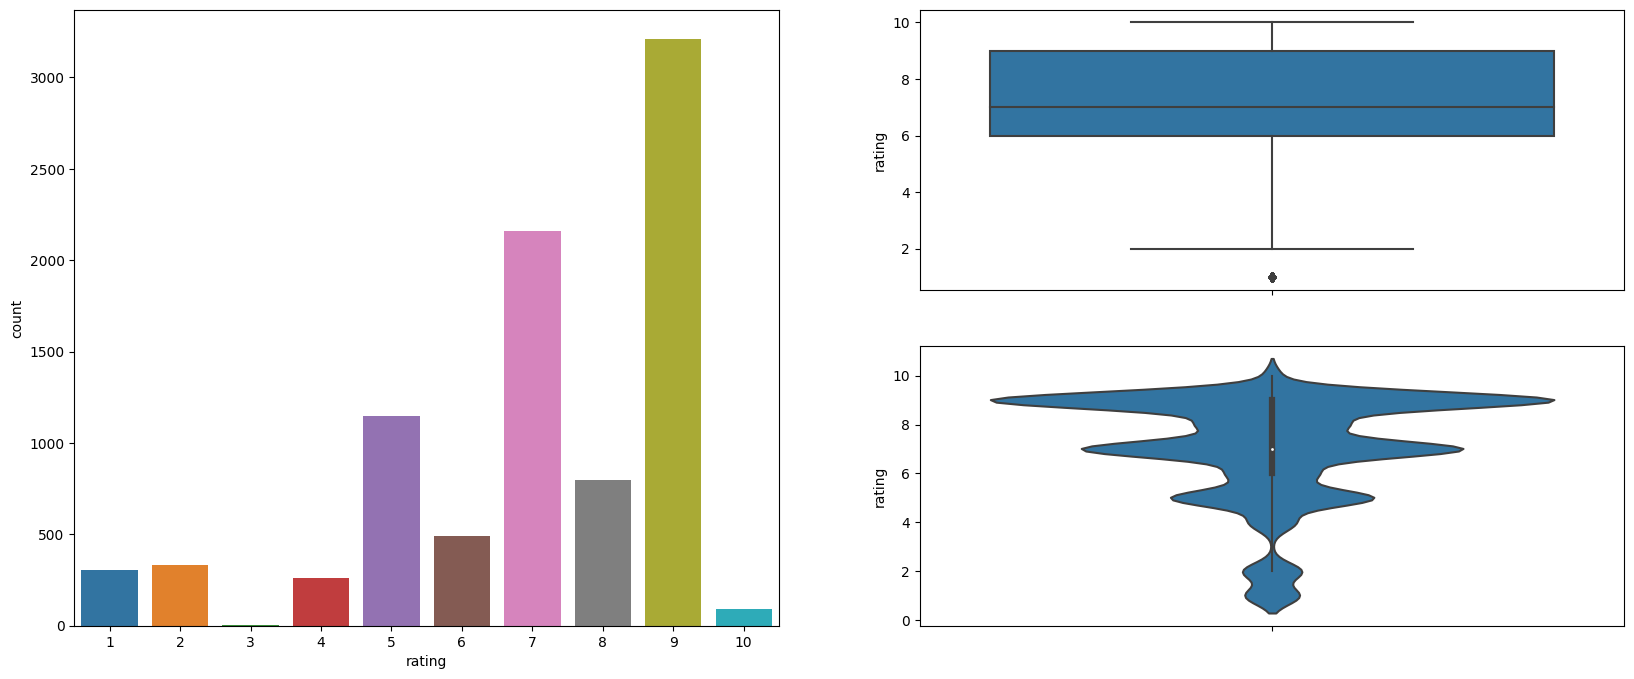

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x=data["rating"])
plt.subplot(2,2,2)
sns.boxplot(y=data["rating"])
plt.subplot(2,2,4)
sns.violinplot(y=data["rating"])
plt.show()

*   88% Shows Avaible are Either Matured Content or Where Parental Guidance is Needed
*   Content avaiable for children is very less

---



---








## Genres - Listed_in

In [ ]:
data2.explode("listed_in")["listed_in"].value_counts().reset_index()

,index,listed_in
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,International TV Shows,1351
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,763
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


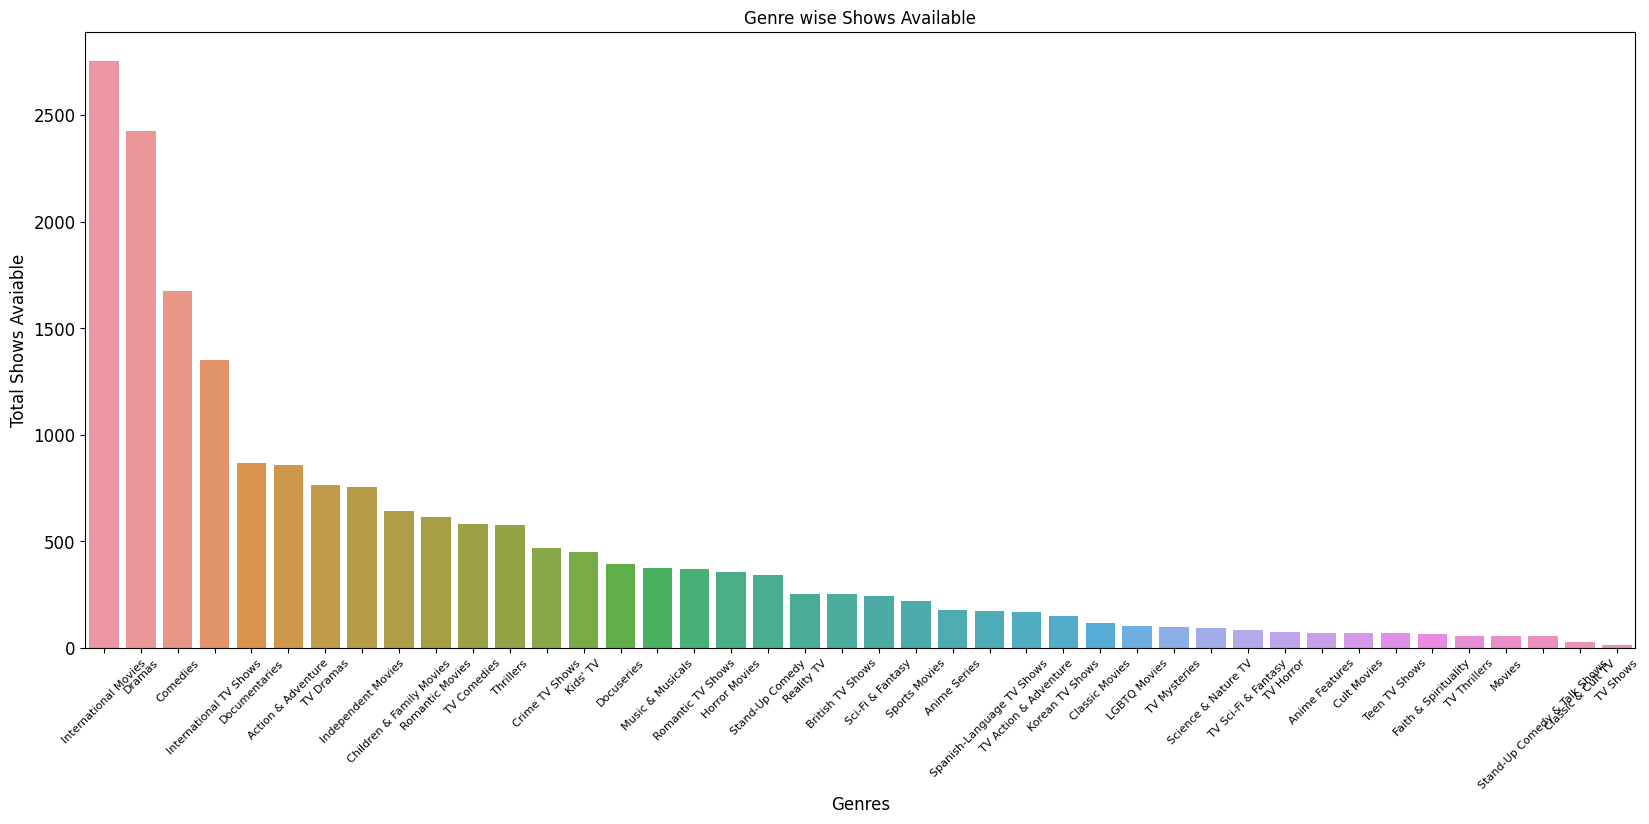

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data = data2.explode("listed_in"),x="listed_in",order =data2.explode("listed_in")["listed_in"].value_counts().index)
plt.title("Genre wise Shows Available",fontsize = 12)
plt.xticks(rotation=45,fontsize = 8)
plt.yticks(fontsize = 12)
plt.xlabel("Genres",fontsize = 12)
plt.ylabel("Total Shows Avaiable",fontsize = 12)
plt.show()

*   There are total 41 Genres avaiable in Netflix

*   Major Content Avaiable in Genre -  "Internation Movies", next is "Dramas"


---



---



# **Comparison of TV Shows vs Movies**

**Creating Separate Dataframe for Movies & TV Shows for easy Analysis**
* Will use below "moviedata" & "tvshowdata" for Separate anlysis whereever needed

In [28]:
moviedata = data2[data2["type"] == "Movie"]
tvshowdata = data2[data2["type"] == "TV Show"]

In [ ]:
moviedata.info()
tvshowdata.info()

# **Country wise Content Comparison**

In [ ]:
moviecountry = moviedata.explode("country").groupby("country")["title"].count().sort_values(ascending=False).reset_index()
moviecountry

,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
...,...,...
117,Nicaragua,1
118,Palestine,1
119,Panama,1
120,Paraguay,1


In [ ]:
tvshowcountry = tvshowdata.explode("country").groupby("country")["title"].count().sort_values(ascending=False).reset_index()
tvshowcountry

,country,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
...,...,...
61,Switzerland,1
62,Hungary,1
63,Malta,1
64,Senegal,1


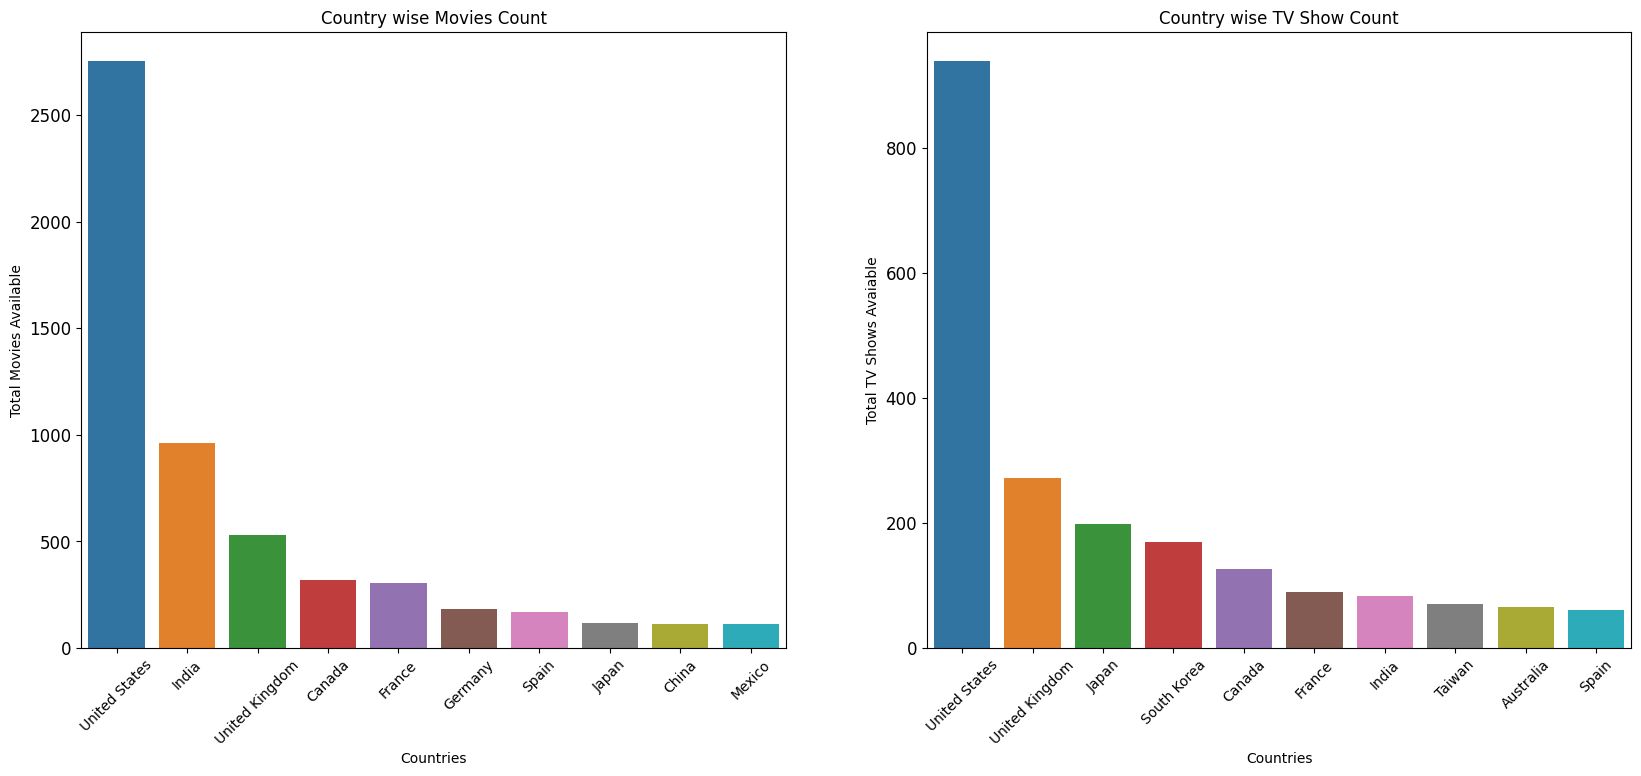

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= moviecountry.iloc[:10], x="country",y="title")
plt.title("Country wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowcountry.iloc[:10], x="country",y="title")
plt.title("Country wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

In [ ]:
countrydata = data2.explode("country").groupby(["type","country"])["title"].count().sort_values(ascending=False).reset_index()
countrydata

,type,country,title
0,Movie,United States,2751
1,Movie,India,962
2,TV Show,United States,938
3,Movie,United Kingdom,532
4,Movie,Canada,319
...,...,...,...
183,Movie,Paraguay,1
184,Movie,Panama,1
185,Movie,Palestine,1
186,Movie,Nicaragua,1


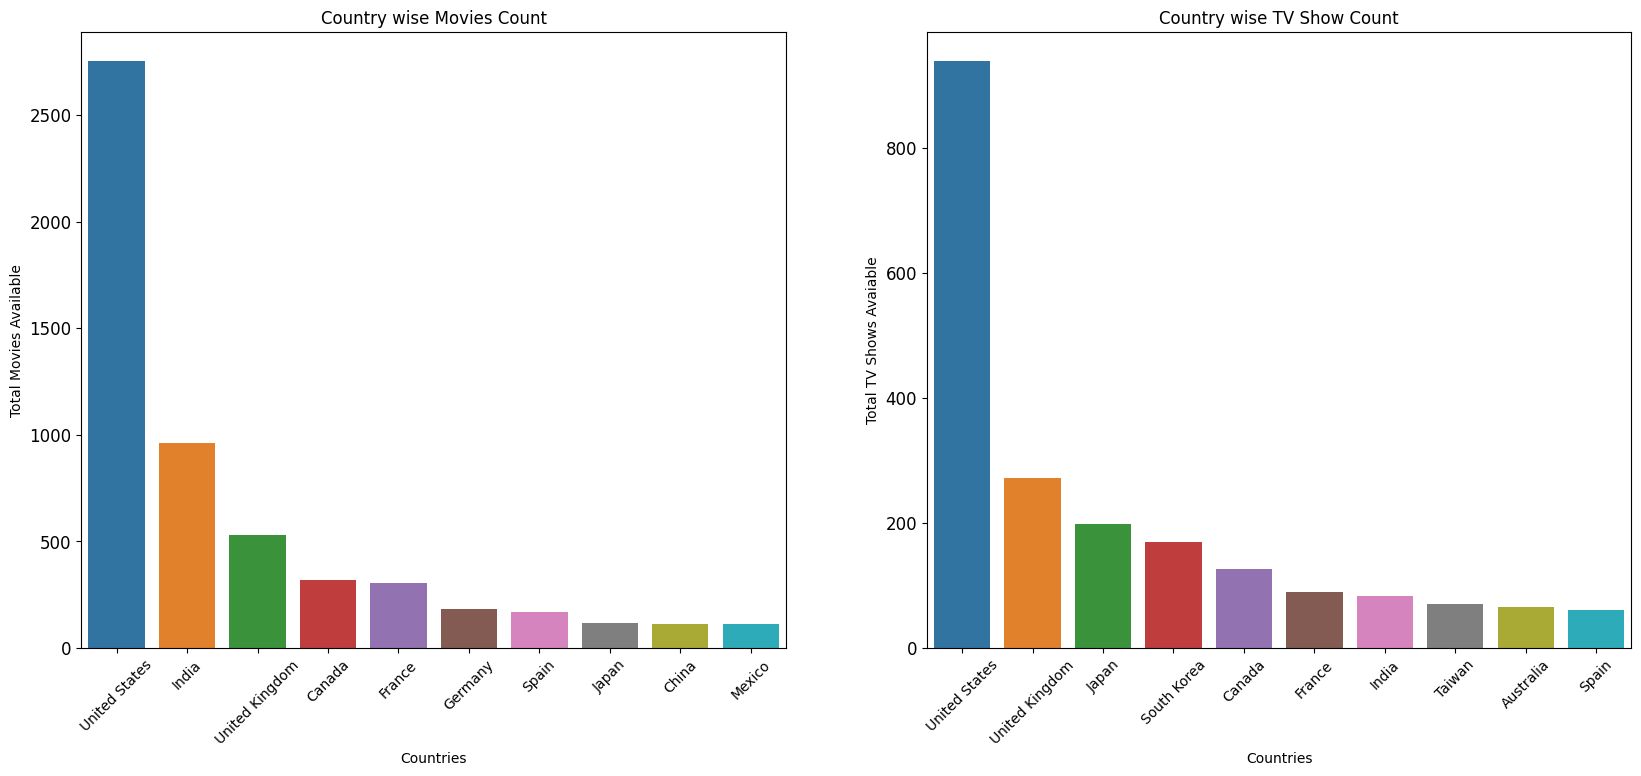

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= countrydata[countrydata["type"] == "Movie"].sort_values("title",ascending = False).iloc[:10], x="country",y="title")
plt.title("Country wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= countrydata[countrydata["type"] == "TV Show"].sort_values("title",ascending = False).iloc[:10], x="country",y="title")
plt.title("Country wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()


*   Netflix Movie Content is avaiable in more countries than its TV Shows
*   Movie Content in avaiable in 122 Countries
*   TV Show Content is avaiable in 66 countries only
*   United States has highest content of Movies and TV Shows in Netflix Platform





# **Best Time to launch Analysis**

In [ ]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   int64         
 9   duration      6131 non-null   int64         
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 622.7+ KB


In [ ]:
weekday = data2.groupby([data2["date_added"].dt.day_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
weekday

,date_added,type,title
0,Friday,Movie,1566
8,Thursday,Movie,1053
1,Friday,TV Show,932
12,Wednesday,Movie,906
10,Tuesday,Movie,852
2,Monday,Movie,628
6,Sunday,Movie,569
4,Saturday,Movie,557
13,Wednesday,TV Show,382
11,Tuesday,TV Show,345


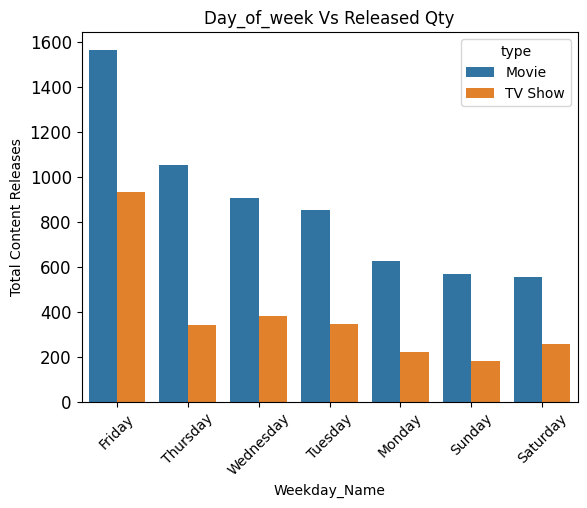

In [ ]:
sns.barplot(data =weekday ,x ="date_added",y= "title", hue="type" )
plt.title("Day_of_week Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Weekday_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)
week

<ipython-input-86-e04e4ef922dd>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = data2.groupby([data2["date_added"].dt.week,"type"])["title"].count().reset_index().sort_values("title",ascending = False)


,date_added,type,title
0,1.0,Movie,316
86,44.0,Movie,243
78,40.0,Movie,215
16,9.0,Movie,207
50,26.0,Movie,195
...,...,...,...
5,3.0,TV Show,32
7,4.0,TV Show,32
3,2.0,TV Show,30
19,10.0,TV Show,28


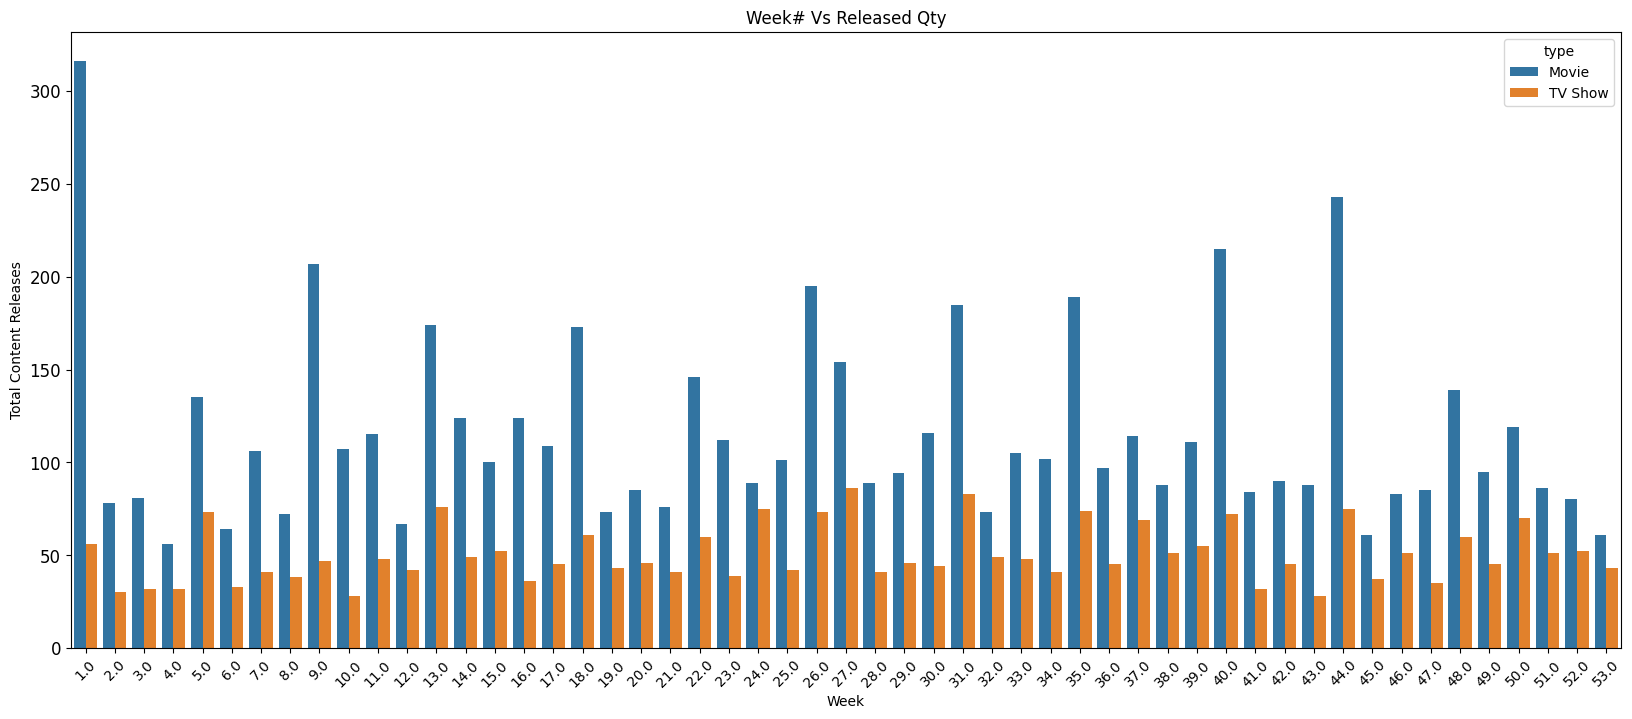

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(data =week ,x ="date_added",y= "title", hue="type" )
plt.title("Week# Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Week",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()

In [ ]:
month = data2.groupby([data2["date_added"].dt.month_name(),"type"])["title"].count().reset_index().sort_values("title",ascending = False)
month

,date_added,type,title
10,July,Movie,565
0,April,Movie,550
4,December,Movie,547
8,January,Movie,546
20,October,Movie,545
14,March,Movie,529
2,August,Movie,519
22,September,Movie,519
18,November,Movie,498
12,June,Movie,492


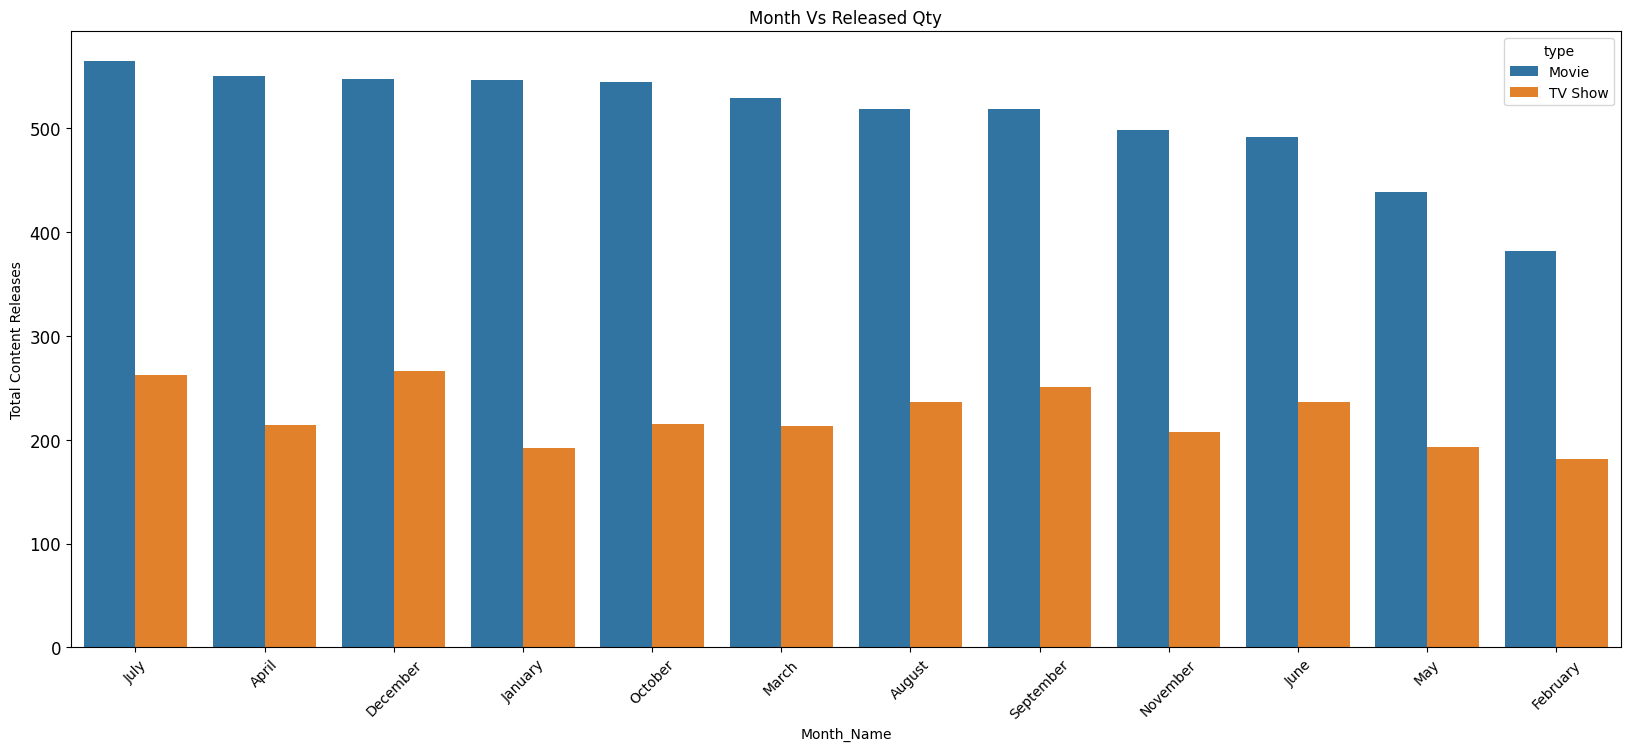

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(data =month ,x ="date_added",y= "title", hue="type" )
plt.title("Month Vs Released Qty",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Month_Name",fontsize = 10)
plt.ylabel("Total Content Releases",fontsize = 10)
plt.show()



* In a Week, Best Day for Relase is Friday
* In a Year,Best Week for Release is First week of Every month , as we can see spike in release every 4 weeks from year's 1st week
* In a Year,No specific Best month for release, July has highest releases, But Decemeber+January has Highest release may be due to holidays
* Overall Best time to release is First week of Year

---



---






# **Analysis of Directors**

In [ ]:
moviedirector = moviedata.explode("director")
moviedirector = moviedirector.groupby("director")["title"].count().sort_values(ascending=False).reset_index()
moviedirector

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Suhas Kadav,16
4,Marcus Raboy,15
...,...,...
4772,José Ortuño,1
4773,Bob Persichetti,1
4774,Jovanka Vuckovic,1
4775,Bob Odenkirk,1


In [ ]:
tvshowdirector = tvshowdata.explode("director")
tvshowdirector = tvshowdirector.groupby("director")["title"].count().sort_values(ascending=False).reset_index()
tvshowdirector

,director,title
0,Ken Burns,3
1,Alastair Fothergill,3
2,Stan Lathan,2
3,Jung-ah Im,2
4,Joe Berlinger,2
...,...,...
294,Hong Won-ki,1
295,Hiroyuki Seshita,1
296,Hikaru Toda,1
297,Hernán Guerschuny,1


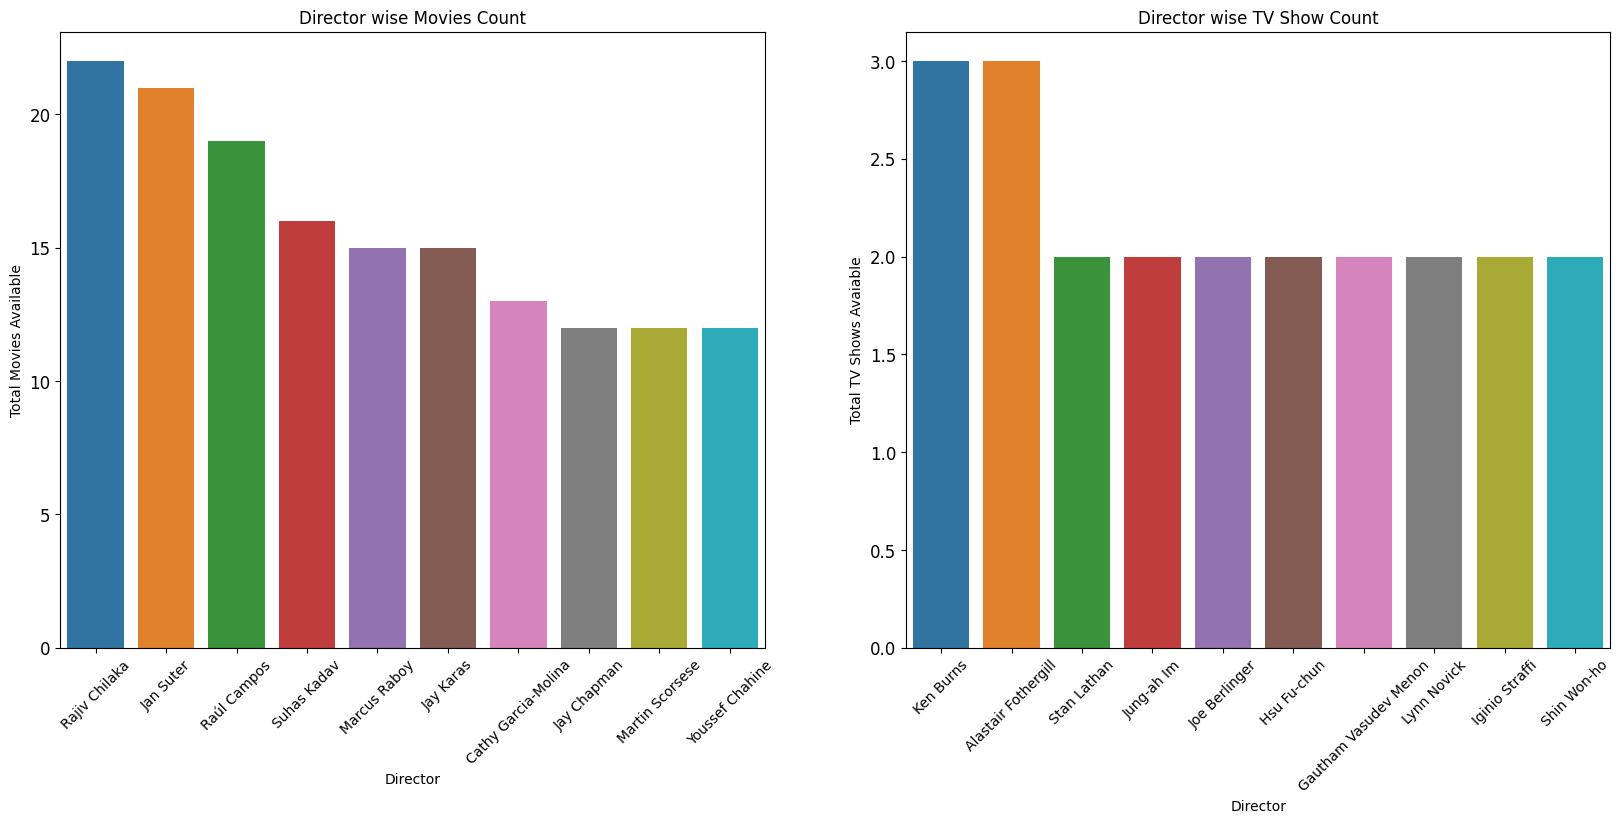

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviedirector.iloc[:10], x="director",y="title")
plt.title("Director wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Director",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowdirector.iloc[:10], x="director",y="title")
plt.title("Director wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Director",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* There are 4777 Nos Director in Movie Content
* there are 299 Nos Director in TV Show Content
* Rajiv Chilaka has directed most movies
* Ken Burns has directed most TV Shows

---



---



# **Analysis of Cast**

In [ ]:
moviecast = moviedata.explode("cast")
moviecast = moviecast.groupby("cast")["title"].count().sort_values(ascending=False).reset_index()
moviecast

,cast,title
0,Anupam Kher,42
1,Shah Rukh Khan,35
2,Naseeruddin Shah,32
3,Om Puri,30
4,Akshay Kumar,30
...,...,...
25946,Jacob Buster,1
25947,Jacob Blair,1
25948,Jacob Bertrand,1
25949,Jacob Batalon,1


In [ ]:
tvshowcast = tvshowdata.explode("cast")
tvshowcast = tvshowcast.groupby("cast")["title"].count().sort_values(ascending=False).reset_index()
tvshowcast

,cast,title
0,Takahiro Sakurai,25
1,Yuki Kaji,19
2,Junichi Suwabe,17
3,Daisuke Ono,17
4,Ai Kayano,17
...,...,...
14858,Ivy Yin,1
14859,Iván Pellicer,1
14860,Iván Álvarez de Araya,1
14861,Iza Moreira,1


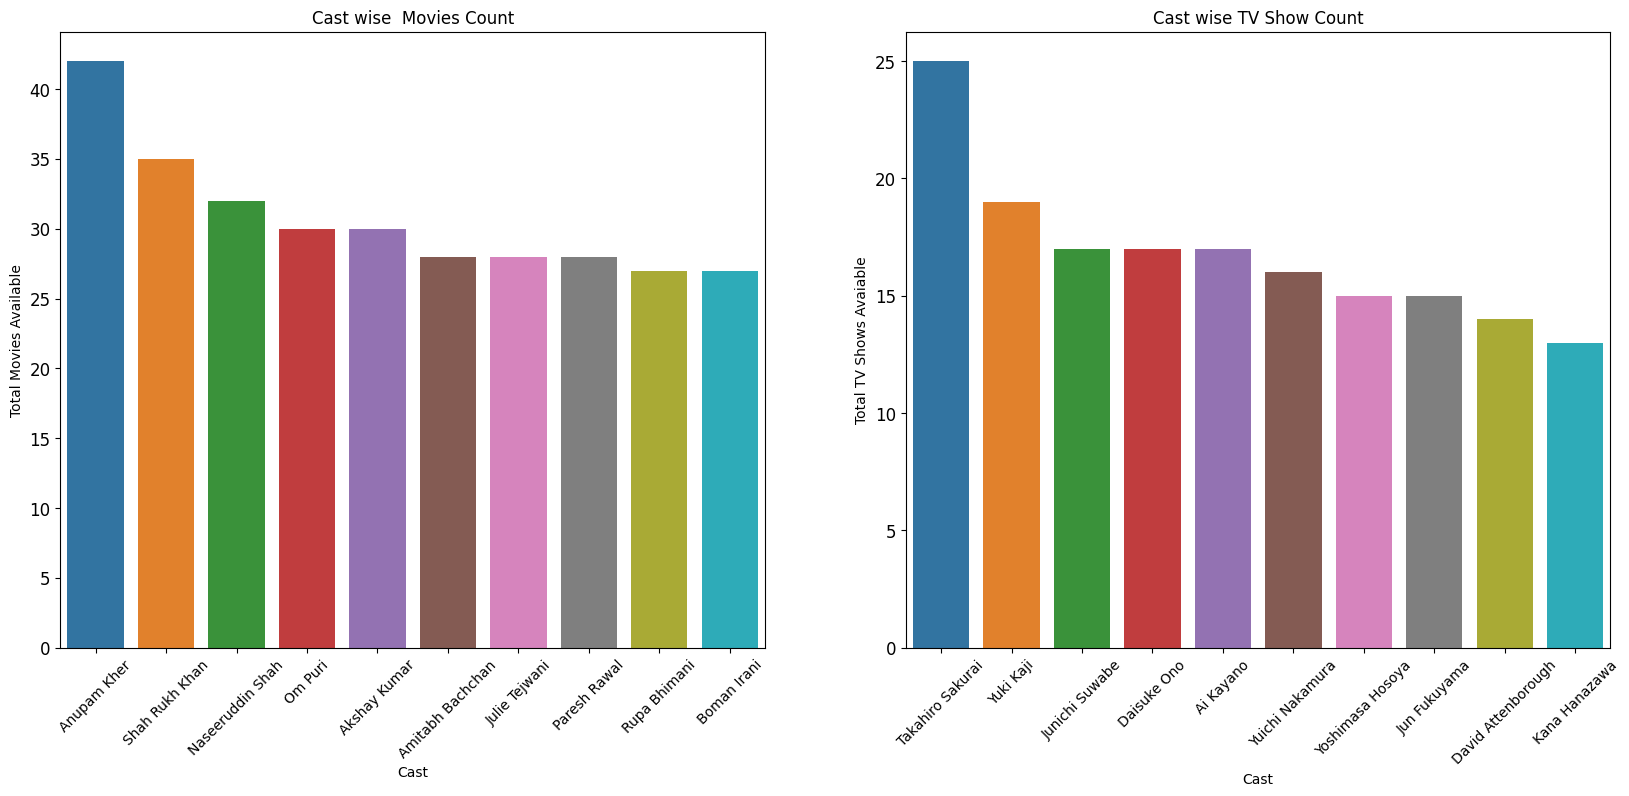

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviecast.iloc[:10], x="cast",y="title")
plt.title("Cast wise  Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Cast",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowcast.iloc[:10], x="cast",y="title")
plt.title("Cast wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Cast",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* There are 25951 Nos Different Cast in Movie Content
* There are 14863 Nos Different Cast in TV Show Content
* Anupam Kher has Acted most movies
* Takahiro Sakurai has acted in most TV Shows

---



---



# **Analysis of Rating**

Note: Ratings has been changed from Categorical to Numerical

*   1 --> Very Child Friendly
*   9 --> Stricly adult Content
*   10 -->Not Rated , NAN, other data like 74 min,84min,66min

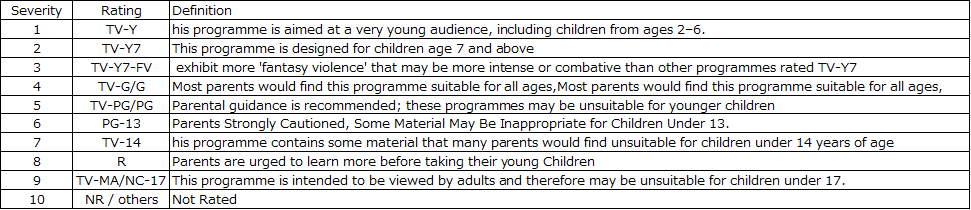








In [ ]:
movierating = moviedata.groupby("rating")["title"].count().reset_index().sort_values("rating")
movierating

In [ ]:
tvshowrating = tvshowdata.groupby("rating")["title"].count().reset_index().sort_values("rating")
tvshowrating

,rating,title
0,1,176
1,2,195
2,3,1
3,4,94
4,5,323
5,7,733
6,8,2
7,9,1145
8,10,7


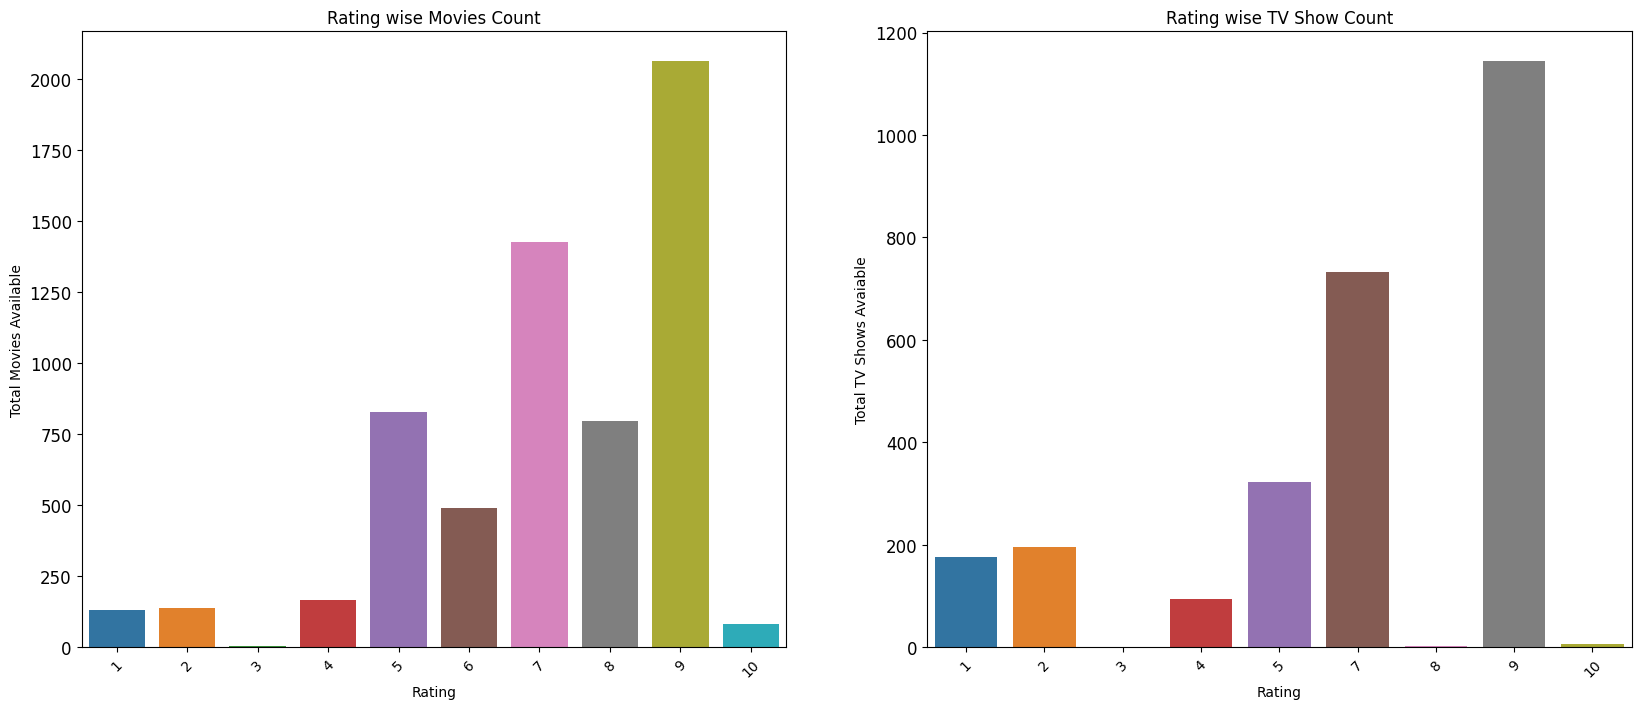

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data= movierating, x="rating",y="title")
plt.title("Rating wise Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Rating",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowrating, x="rating",y="title")
plt.title("Rating wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Rating",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

*   88% Content Avaible is Either Matured Content or Where Parental Guidance is Needed
*   Content avaiable for children is very less compared to content avaialable for matured Audience

---



---








# **Analysis of Genre**

In [ ]:
moviegenre = moviedata.explode("listed_in")
moviegenre = moviegenre.groupby("listed_in")["title"].count().sort_values(ascending = False).reset_index()
moviegenre

,listed_in,title
0,International Movies,2752
1,Dramas,2427
2,Comedies,1674
3,Documentaries,869
4,Action & Adventure,859
5,Independent Movies,756
6,Children & Family Movies,641
7,Romantic Movies,616
8,Thrillers,577
9,Music & Musicals,375


In [ ]:
tvshowgenre = tvshowdata.explode("listed_in")
tvshowgenre = tvshowgenre.groupby("listed_in")["title"].count().sort_values(ascending = False).reset_index()
tvshowgenre

,listed_in,title
0,International TV Shows,1351
1,TV Dramas,763
2,TV Comedies,581
3,Crime TV Shows,470
4,Kids' TV,451
5,Docuseries,395
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,253
9,Anime Series,176


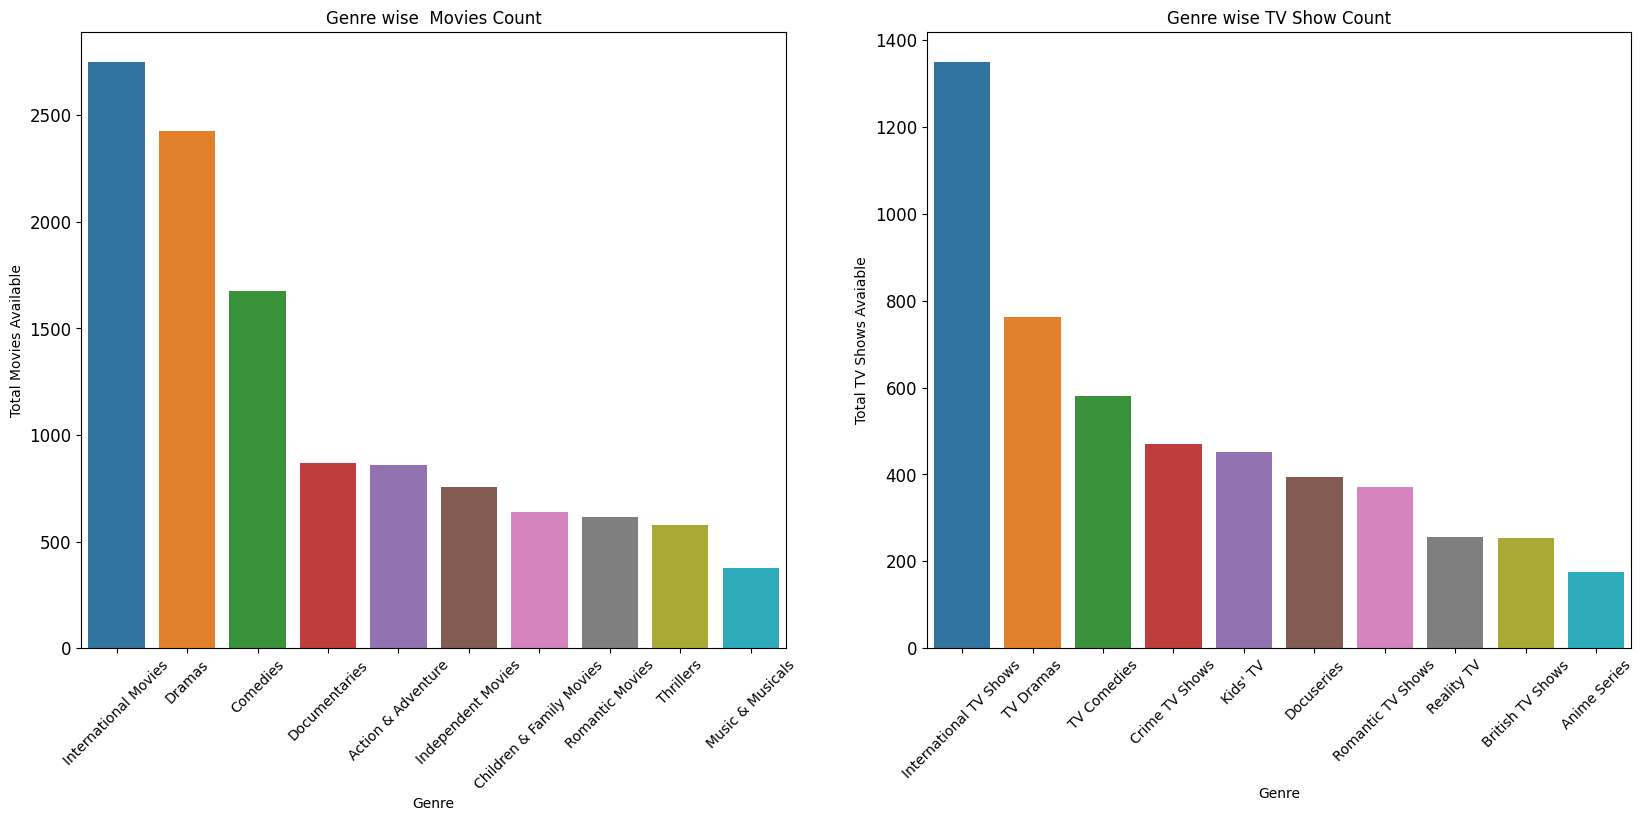

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.barplot(data = moviegenre.iloc[:10], x="listed_in",y="title")
plt.title("Genre wise  Movies Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.barplot(data= tvshowgenre.iloc[:10], x="listed_in",y="title")
plt.title("Genre wise TV Show Count",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* Internation Movies/TV shows are more popular Content in Netflix
* Next popular content comes in  Genres like Drama and then Comedy

---



---



# **Analysis of Duration**

In [ ]:
moviedata.groupby("duration")["title"].count()

In [ ]:
tvshowdata.groupby("duration")["title"].count()

In [ ]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6131 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6131 non-null   object        
 1   type          6131 non-null   object        
 2   title         6131 non-null   object        
 3   director      5943 non-null   object        
 4   cast          5656 non-null   object        
 5   country       5691 non-null   object        
 6   date_added    6131 non-null   datetime64[ns]
 7   release_year  6131 non-null   int64         
 8   rating        6131 non-null   int64         
 9   duration      6131 non-null   int64         
 10  listed_in     6131 non-null   object        
 11  description   6131 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 622.7+ KB


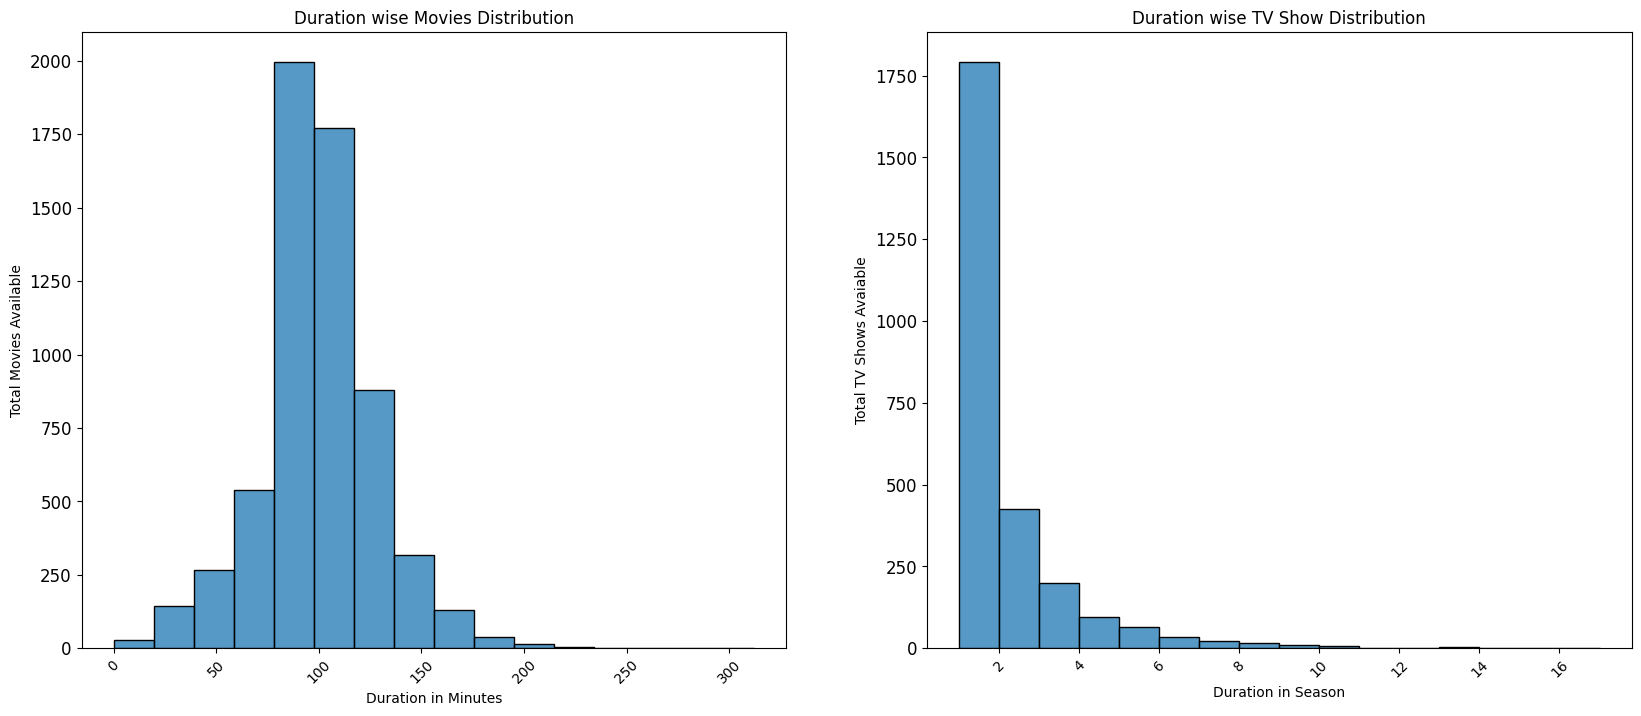

In [30]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.histplot(moviedata["duration"],bins = 16)
plt.title("Duration wise Movies Distribution",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Duration in Minutes",fontsize = 10)
plt.ylabel("Total Movies Available",fontsize = 10)
plt.subplot(1,2,2)
sns.histplot(tvshowdata["duration"],bins=16)
plt.title("Duration wise TV Show Distribution",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Duration in Season",fontsize = 10)
plt.ylabel("Total TV Shows Avaiable",fontsize = 10)
plt.show()

* 60% of the Movie have Duration range between 80-120 Mins
* 65% of the TV shows have 1 Season

# **Better Time to Add Content after Releasing**

* Considering Shows with Release Year from 1990 to latest

In [ ]:
datatimetoadd = data2[(data2["release_year"] >=1990)]

In [ ]:
datatimetoadd.info()

In [ ]:
datatimetoadd["timeDiff"] = datatimetoadd["date_added"].dt.year - datatimetoadd["release_year"]

In [ ]:
datatimetoadd["timeDiff"]

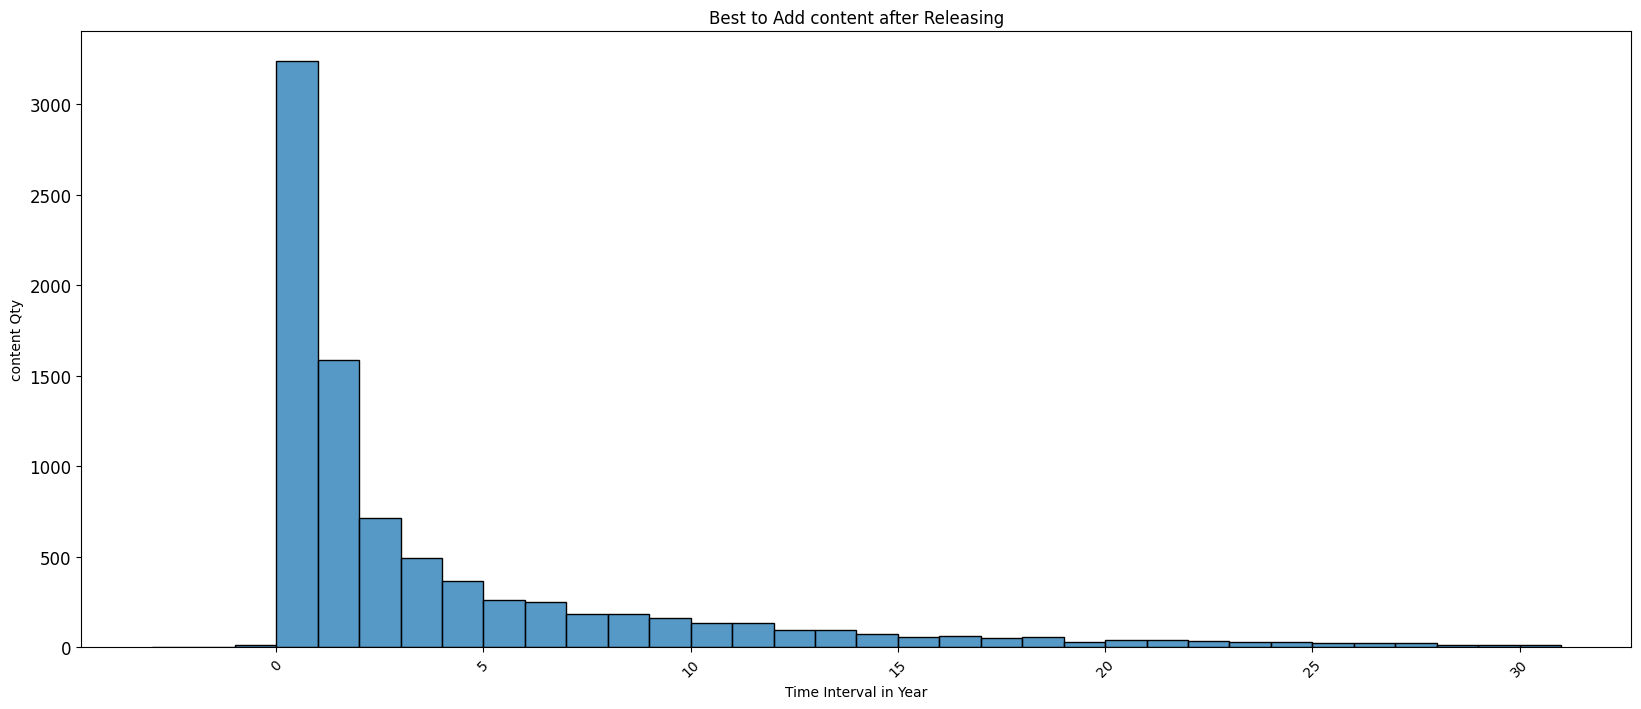

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(datatimetoadd["timeDiff"],bins=34)
plt.title("Best to Add content after Releasing",fontsize = 12)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Time Interval in Year",fontsize = 10)
plt.ylabel("content Qty",fontsize = 10)
plt.show()

* Best time to add Content after Releasing is within 1 Year

# **Experimental**

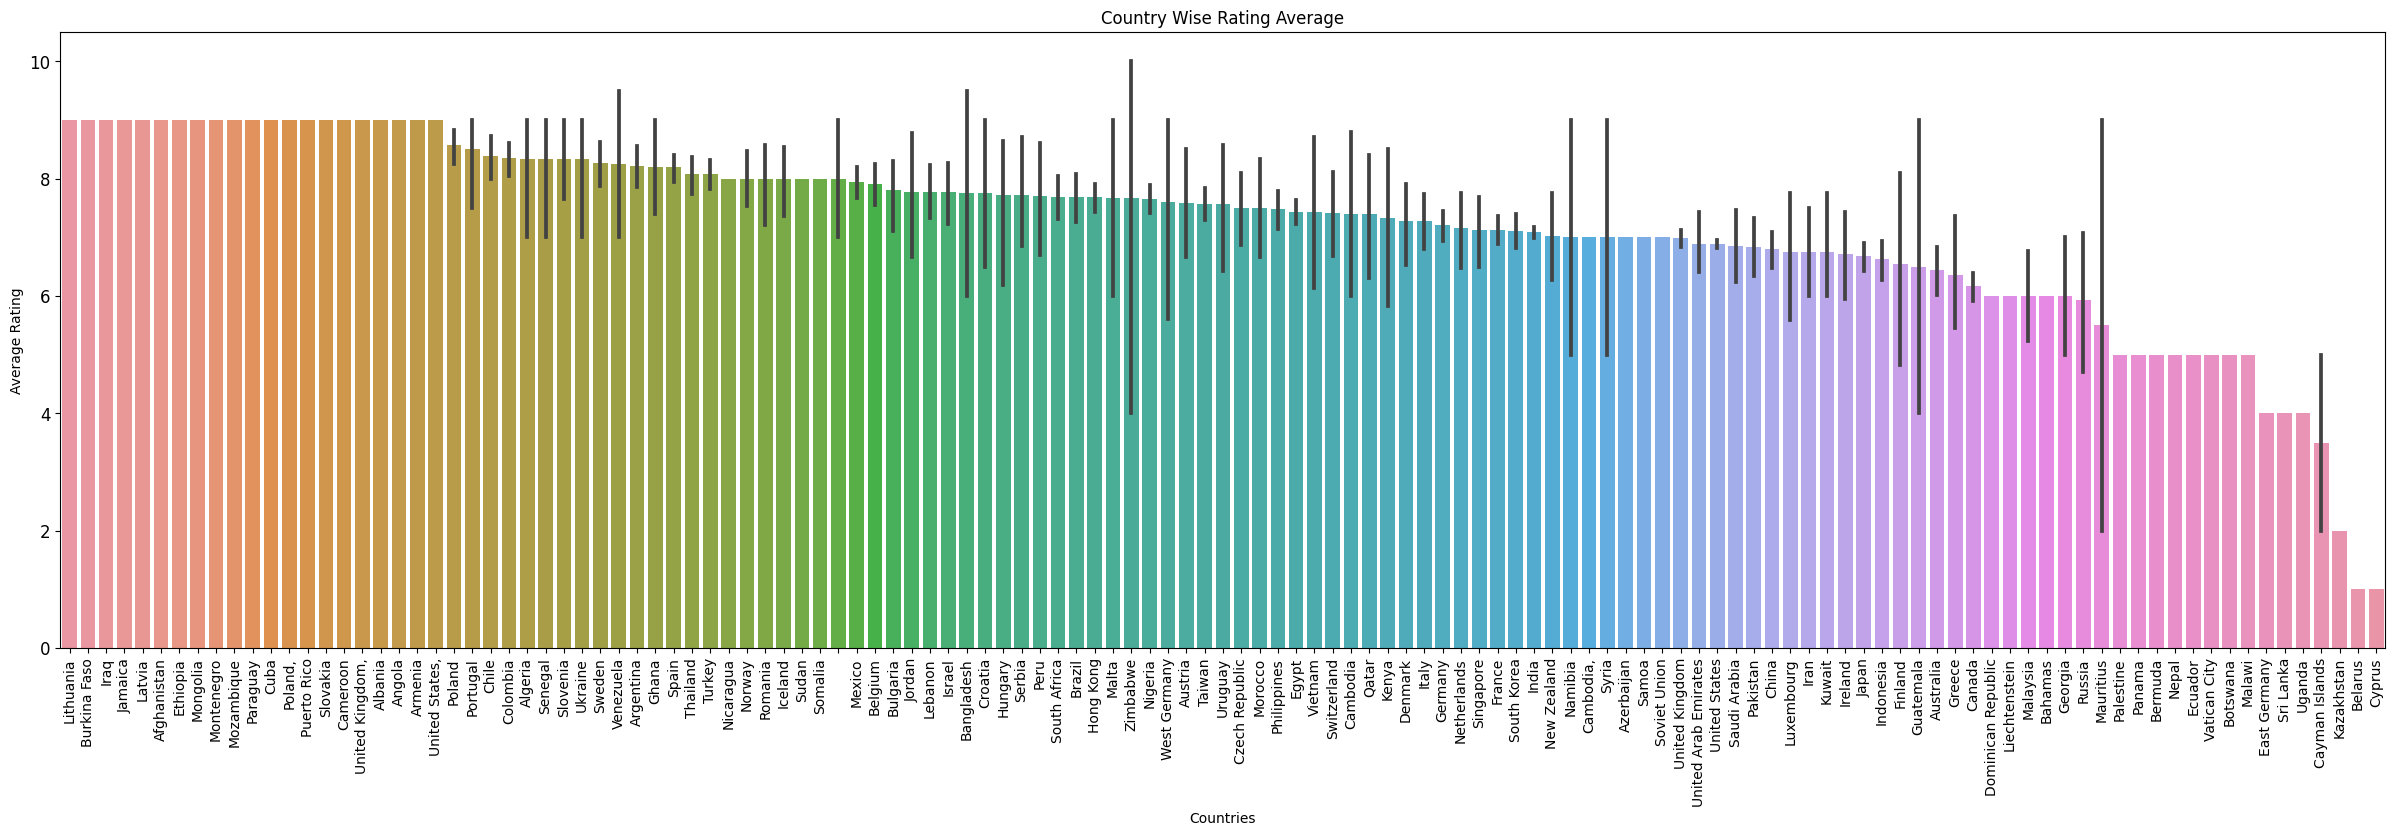

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data = data2.explode("country"), x= "country", y= "rating",estimator = np.mean,order = data2.explode("country").groupby("country")["rating"].mean().sort_values(ascending = False).index)
plt.title("Country Wise Rating Average",fontsize = 12)
plt.xticks(rotation=90,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Countries",fontsize = 10)
plt.ylabel("Average Rating",fontsize = 10)
plt.show()


# **Genre & Rating Relation Analysis**

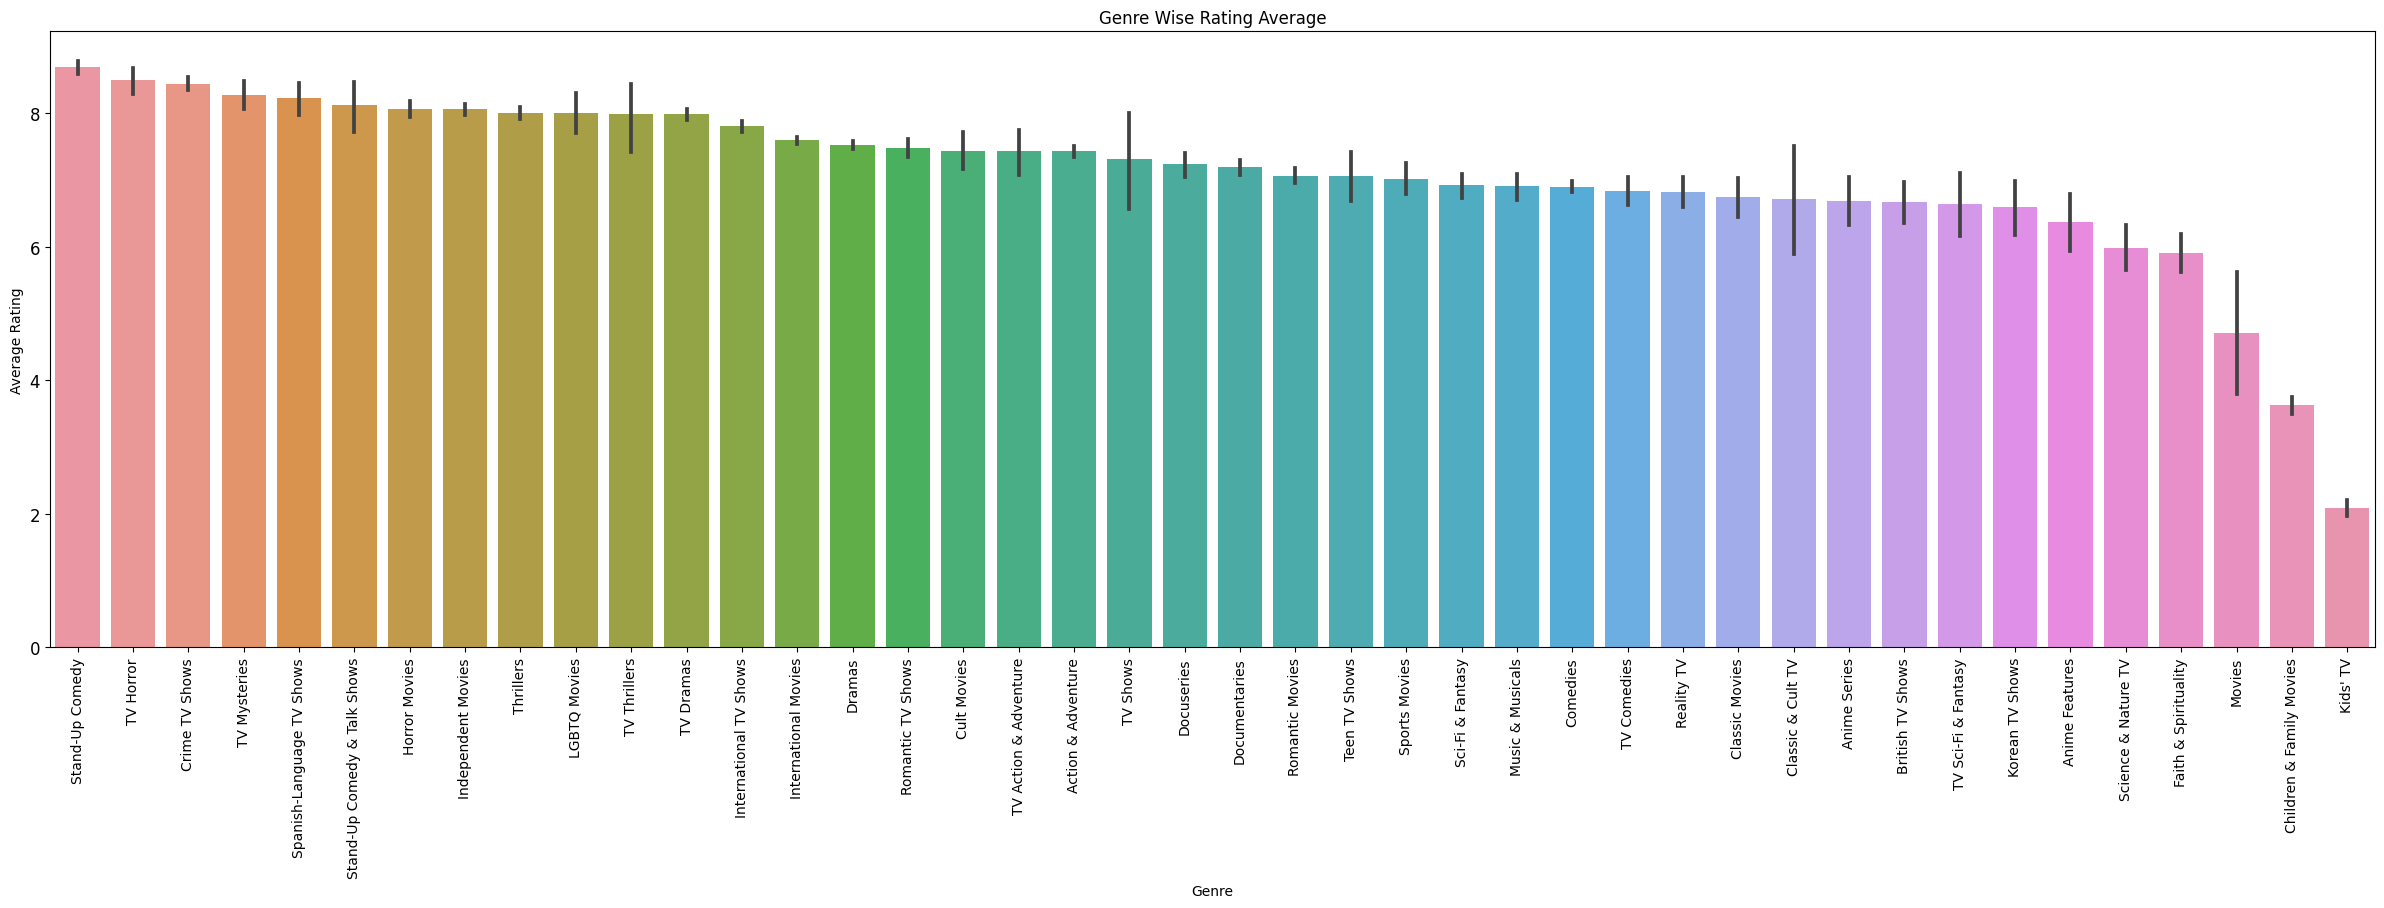

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(data = data2.explode("listed_in"), x= "listed_in", y= "rating",estimator = np.mean,order = data2.explode("listed_in").groupby("listed_in")["rating"].mean().sort_values(ascending = False).index)
plt.title("Genre Wise Rating Average",fontsize = 12)
plt.xticks(rotation=90,fontsize = 10)
plt.yticks(fontsize = 12)
plt.xlabel("Genre",fontsize = 10)
plt.ylabel("Average Rating",fontsize = 10)
plt.show()


* Genre & Ratings seems quire Acceptable
* Genres like Crime & Horror are having mean rating of 9
* Genres like Kids TV is having mean rating of 3

In [ ]:
data2.corr()

<ipython-input-140-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,release_year,rating,duration
release_year,1.000000,0.071974,-0.249087
rating,0.071974,1.000000,0.141633
duration,-0.249087,0.141633,1.000000


# **Content Release & Added year relation**

In [31]:
data2["added_year"] = data2["date_added"].dt.year

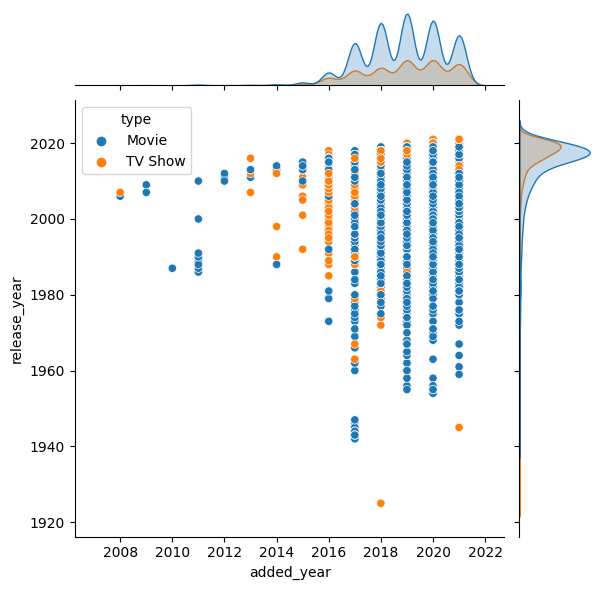

In [33]:
sns.jointplot(data=data2,x="added_year",y="release_year",hue="type")

* Rapid Content Addition in Netflix  has started from 2016
* Netflix has Major content which was release between 2000 to 2021
* Oldest Content Netflix has is of year 1925 and latest is of year 2021

# **Highest Content Avaiable Country vs Rating Distribution**

In [34]:
data3 = data2.explode("country")
data3 = data3[(data3["country"]== "United States") | (data3["country"]== "India") | (data3["country"]== "United Kingdom") | (data3["country"]== "Canada")| (data3["country"]== "France")]

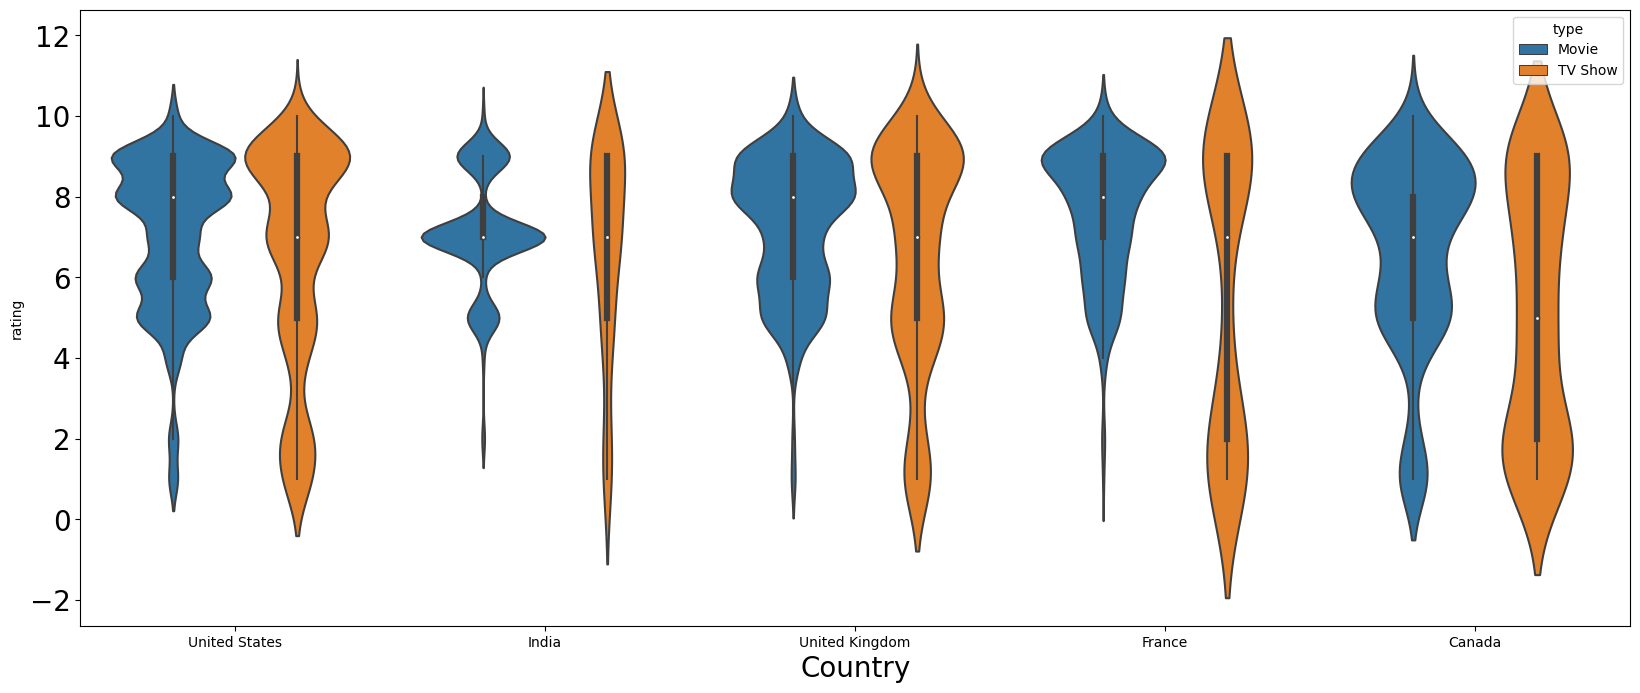

In [38]:
plt.figure(figsize=(20,8))
sns.violinplot(data=data3,x="country", y="rating",hue = "type")
plt.yticks(fontsize = 20)
plt.xlabel("Country",fontsize = 20)
plt.show()

# **Business Insights**

* Netflix has more Movies[6131] than TV Shows[2676]
* Netflix has coverage in 127 Countries however Movies content is avaiable in 122 countries & TV show Content only in 66 Countries [ USA has overall highest content avaiable]
* Netflix has content created by 4994 Directors, however 4000 of them have only their 1st content avaiable in Netflix
* Netflix has content acted by 36439 Actors, however 3000 of them have only their 1st content avaiable in Netflix
* Netflix started content addition from 2008 and adding content since then every year, also started to drastically increase from 2016 & Peaked in year 2019 with 2016 Nos content added in single year
* 88% Shows Avaible are Either Matured Content or Where Parental Guidance is Needed,Content avaiable for children is very less
* Best time to Launch Content is on Friday of a week & 1st week of a Month & December/January of a Year
* Netflix has Movies in 20 Genres & 22 Genres in TV Shows
* 60% of the Movie have Duration range between 80-120 Mins &
65% of the TV shows have only 1 Season
* Best time to add Content in Netflix is with in One year of Releasing
* Oldest Content Netflix has is of year 1925 and latest is of year 2021






# **Recommendations**

* Netflix should Expand its Coverage fro 127 Countries to all 195 countries in world
* Particularily, Netflix should expand its TV show coverage to all 122 Countries Where Movie Content is presently avaiable
* Netflix should increase Children Friendly content
* Content addition has drastically grown from 2016 & kept growing Continuously, Netflix should prepare its infrastructure & Resources to meet growing Market

